In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
latent_size = 64
hidden_size = 256
image_size = 28 * 28
batch_size = 100
num_epochs = 200
learning_rate = 0.0002

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

mnist = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:12<00:00, 800086.81it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 121966.90it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:06<00:00, 240359.45it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2380423.44it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
# Generator network
class Generator(nn.Module):
    def __init__(self, latent_size, hidden_size, image_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, image_size),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.model(x)

# Discriminator network
class Discriminator(nn.Module):
    def __init__(self, image_size, hidden_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)


In [4]:
# Initialize networks
generator = Generator(latent_size, hidden_size, image_size).to(device)
discriminator = Discriminator(image_size, hidden_size).to(device)

# Optimizers and loss function
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)

Epoch [1/200], Step [200/600], D Loss: 0.0664, G Loss: 3.9719, D(x): 0.99, D(G(z)): 0.06
Epoch [1/200], Step [400/600], D Loss: 0.3269, G Loss: 5.4442, D(x): 0.96, D(G(z)): 0.18
Epoch [1/200], Step [600/600], D Loss: 0.0198, G Loss: 5.4070, D(x): 0.99, D(G(z)): 0.01


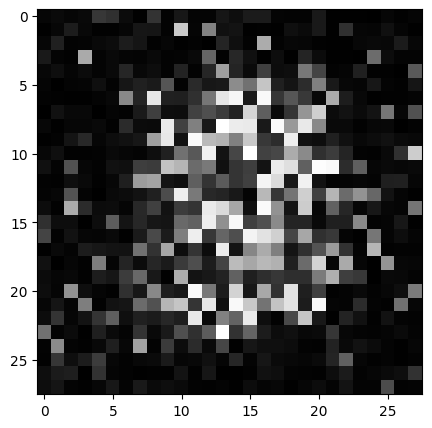

Epoch [2/200], Step [200/600], D Loss: 0.0375, G Loss: 5.9503, D(x): 0.98, D(G(z)): 0.02
Epoch [2/200], Step [400/600], D Loss: 0.2392, G Loss: 4.9508, D(x): 0.89, D(G(z)): 0.05
Epoch [2/200], Step [600/600], D Loss: 0.1694, G Loss: 5.2162, D(x): 0.95, D(G(z)): 0.07


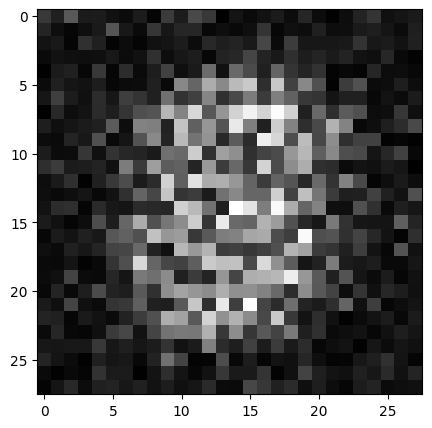

Epoch [3/200], Step [200/600], D Loss: 0.6568, G Loss: 3.2622, D(x): 0.75, D(G(z)): 0.14
Epoch [3/200], Step [400/600], D Loss: 0.3332, G Loss: 3.0391, D(x): 0.89, D(G(z)): 0.11
Epoch [3/200], Step [600/600], D Loss: 0.3935, G Loss: 3.6794, D(x): 0.88, D(G(z)): 0.14


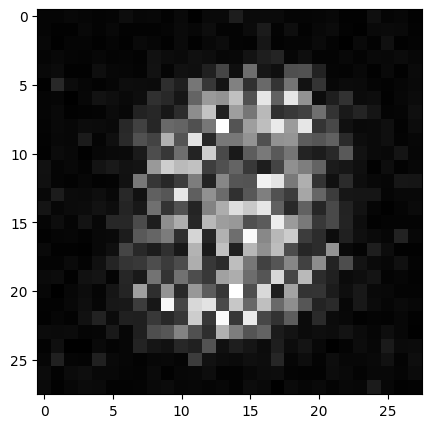

Epoch [4/200], Step [200/600], D Loss: 0.4705, G Loss: 2.7742, D(x): 0.88, D(G(z)): 0.18
Epoch [4/200], Step [400/600], D Loss: 0.3323, G Loss: 2.8055, D(x): 0.89, D(G(z)): 0.13
Epoch [4/200], Step [600/600], D Loss: 0.3312, G Loss: 4.4199, D(x): 0.84, D(G(z)): 0.02


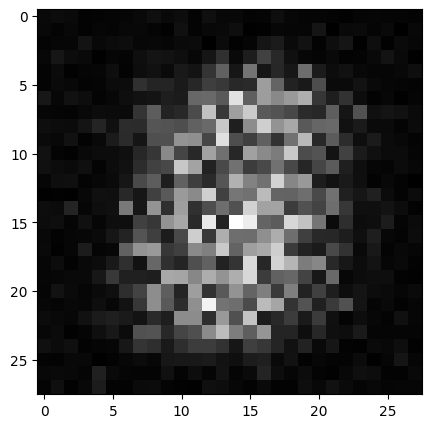

Epoch [5/200], Step [200/600], D Loss: 0.3126, G Loss: 4.6060, D(x): 0.88, D(G(z)): 0.07
Epoch [5/200], Step [400/600], D Loss: 0.3761, G Loss: 2.4854, D(x): 0.88, D(G(z)): 0.14
Epoch [5/200], Step [600/600], D Loss: 0.4589, G Loss: 3.5247, D(x): 0.83, D(G(z)): 0.03


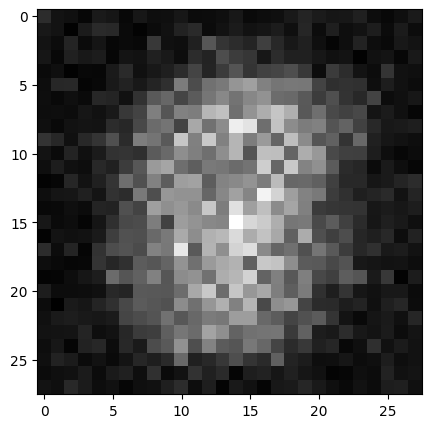

Epoch [6/200], Step [200/600], D Loss: 0.3359, G Loss: 2.8285, D(x): 0.91, D(G(z)): 0.13
Epoch [6/200], Step [400/600], D Loss: 0.7180, G Loss: 5.6683, D(x): 0.86, D(G(z)): 0.21
Epoch [6/200], Step [600/600], D Loss: 0.8820, G Loss: 3.1373, D(x): 0.76, D(G(z)): 0.18


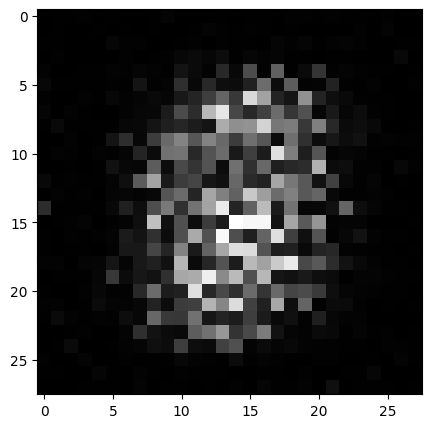

Epoch [7/200], Step [200/600], D Loss: 0.2055, G Loss: 4.1144, D(x): 0.90, D(G(z)): 0.05
Epoch [7/200], Step [400/600], D Loss: 0.3530, G Loss: 4.4170, D(x): 0.84, D(G(z)): 0.04
Epoch [7/200], Step [600/600], D Loss: 0.5458, G Loss: 1.2953, D(x): 0.80, D(G(z)): 0.17


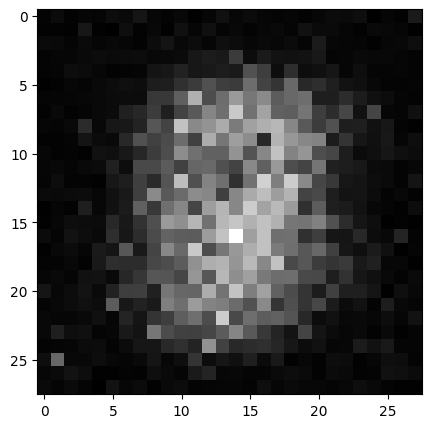

Epoch [8/200], Step [200/600], D Loss: 0.3114, G Loss: 4.1195, D(x): 0.88, D(G(z)): 0.10
Epoch [8/200], Step [400/600], D Loss: 0.1835, G Loss: 4.5798, D(x): 0.90, D(G(z)): 0.04
Epoch [8/200], Step [600/600], D Loss: 0.2442, G Loss: 2.9594, D(x): 0.94, D(G(z)): 0.11


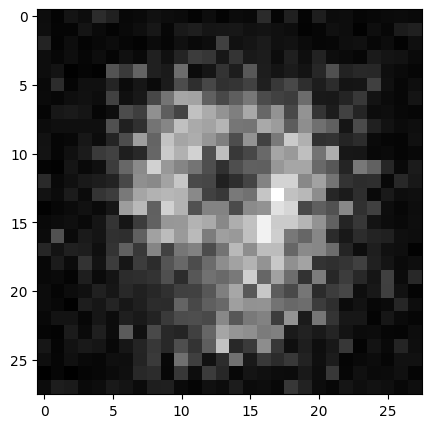

Epoch [9/200], Step [200/600], D Loss: 0.4101, G Loss: 5.8880, D(x): 0.88, D(G(z)): 0.07
Epoch [9/200], Step [400/600], D Loss: 0.5679, G Loss: 3.4363, D(x): 0.84, D(G(z)): 0.12
Epoch [9/200], Step [600/600], D Loss: 0.1707, G Loss: 4.7517, D(x): 0.97, D(G(z)): 0.11


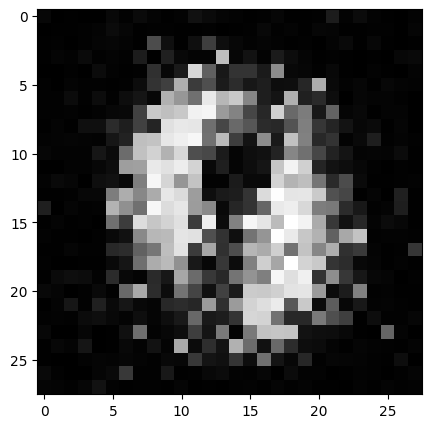

Epoch [10/200], Step [200/600], D Loss: 0.2460, G Loss: 3.1188, D(x): 0.93, D(G(z)): 0.11
Epoch [10/200], Step [400/600], D Loss: 0.1785, G Loss: 3.5612, D(x): 0.94, D(G(z)): 0.06
Epoch [10/200], Step [600/600], D Loss: 0.1725, G Loss: 3.8326, D(x): 0.95, D(G(z)): 0.05


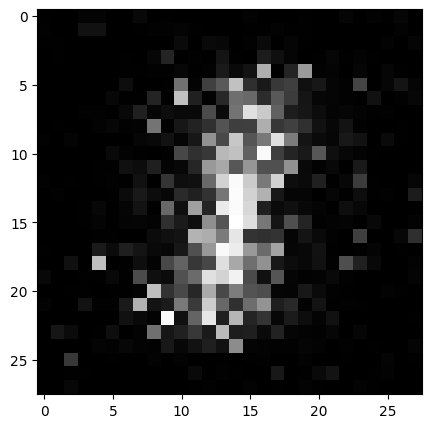

Epoch [11/200], Step [200/600], D Loss: 0.1134, G Loss: 5.2121, D(x): 0.98, D(G(z)): 0.06
Epoch [11/200], Step [400/600], D Loss: 0.3291, G Loss: 3.9658, D(x): 0.96, D(G(z)): 0.19
Epoch [11/200], Step [600/600], D Loss: 0.2923, G Loss: 5.0976, D(x): 0.88, D(G(z)): 0.03


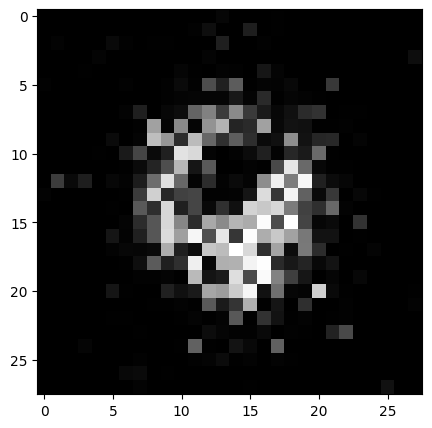

Epoch [12/200], Step [200/600], D Loss: 0.1367, G Loss: 5.1955, D(x): 0.94, D(G(z)): 0.03
Epoch [12/200], Step [400/600], D Loss: 0.1978, G Loss: 5.2254, D(x): 0.93, D(G(z)): 0.04
Epoch [12/200], Step [600/600], D Loss: 0.1833, G Loss: 6.3959, D(x): 0.92, D(G(z)): 0.01


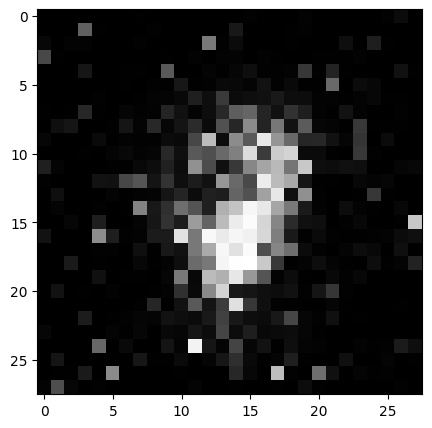

Epoch [13/200], Step [200/600], D Loss: 0.1478, G Loss: 5.3692, D(x): 0.97, D(G(z)): 0.07
Epoch [13/200], Step [400/600], D Loss: 0.2269, G Loss: 4.3862, D(x): 0.99, D(G(z)): 0.17
Epoch [13/200], Step [600/600], D Loss: 0.0824, G Loss: 4.2596, D(x): 0.99, D(G(z)): 0.06


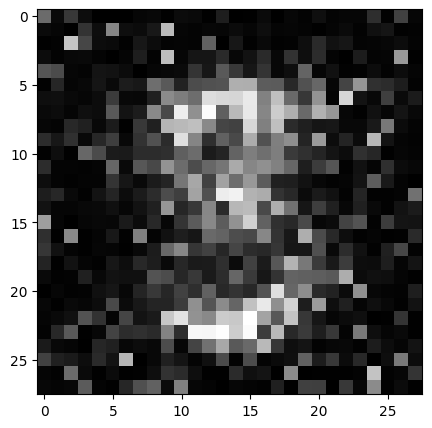

Epoch [14/200], Step [200/600], D Loss: 0.2995, G Loss: 4.2276, D(x): 0.91, D(G(z)): 0.07
Epoch [14/200], Step [400/600], D Loss: 0.3698, G Loss: 5.4984, D(x): 0.92, D(G(z)): 0.03
Epoch [14/200], Step [600/600], D Loss: 0.4670, G Loss: 5.4167, D(x): 0.85, D(G(z)): 0.03


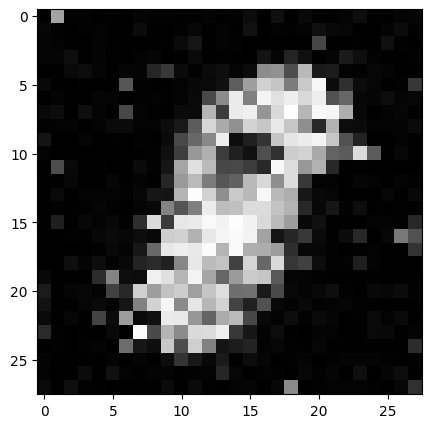

Epoch [15/200], Step [200/600], D Loss: 0.1933, G Loss: 5.1358, D(x): 0.94, D(G(z)): 0.07
Epoch [15/200], Step [400/600], D Loss: 0.3297, G Loss: 4.3534, D(x): 0.88, D(G(z)): 0.04
Epoch [15/200], Step [600/600], D Loss: 0.1086, G Loss: 4.9757, D(x): 0.97, D(G(z)): 0.05


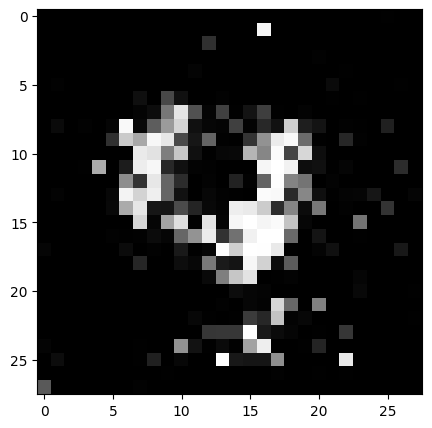

Epoch [16/200], Step [200/600], D Loss: 0.2915, G Loss: 5.8122, D(x): 0.95, D(G(z)): 0.11
Epoch [16/200], Step [400/600], D Loss: 0.1381, G Loss: 4.9670, D(x): 0.99, D(G(z)): 0.10
Epoch [16/200], Step [600/600], D Loss: 0.3702, G Loss: 3.8093, D(x): 0.89, D(G(z)): 0.08


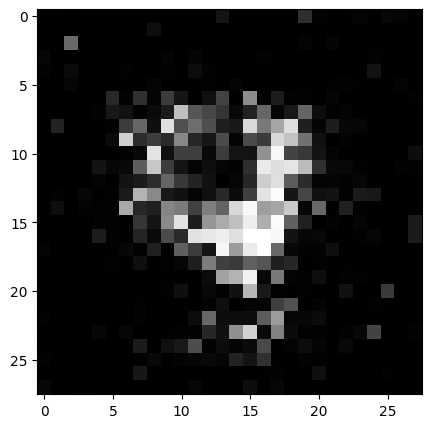

Epoch [17/200], Step [200/600], D Loss: 0.1348, G Loss: 3.4055, D(x): 0.95, D(G(z)): 0.04
Epoch [17/200], Step [400/600], D Loss: 0.0877, G Loss: 4.4204, D(x): 0.96, D(G(z)): 0.03
Epoch [17/200], Step [600/600], D Loss: 0.0959, G Loss: 4.3492, D(x): 0.97, D(G(z)): 0.03


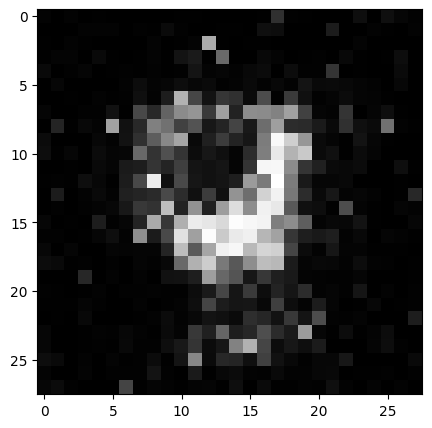

Epoch [18/200], Step [200/600], D Loss: 0.1530, G Loss: 5.2303, D(x): 0.96, D(G(z)): 0.07
Epoch [18/200], Step [400/600], D Loss: 0.1343, G Loss: 7.0089, D(x): 0.96, D(G(z)): 0.01
Epoch [18/200], Step [600/600], D Loss: 0.1178, G Loss: 5.1955, D(x): 0.96, D(G(z)): 0.02


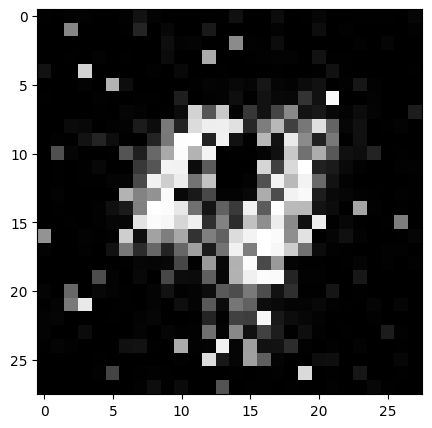

Epoch [19/200], Step [200/600], D Loss: 0.1492, G Loss: 6.0664, D(x): 0.97, D(G(z)): 0.09
Epoch [19/200], Step [400/600], D Loss: 0.1784, G Loss: 5.1938, D(x): 0.94, D(G(z)): 0.01
Epoch [19/200], Step [600/600], D Loss: 0.1539, G Loss: 8.0250, D(x): 0.99, D(G(z)): 0.09


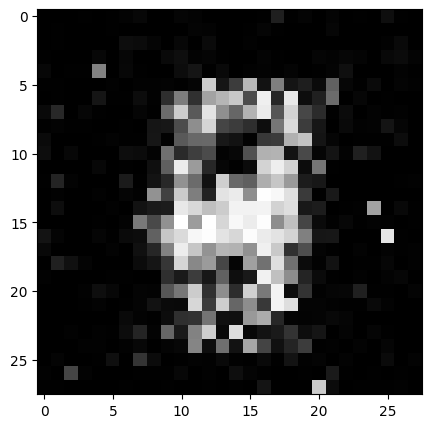

Epoch [20/200], Step [200/600], D Loss: 0.1340, G Loss: 5.4691, D(x): 0.95, D(G(z)): 0.05
Epoch [20/200], Step [400/600], D Loss: 0.1954, G Loss: 4.3847, D(x): 0.98, D(G(z)): 0.11
Epoch [20/200], Step [600/600], D Loss: 0.1746, G Loss: 4.9201, D(x): 0.95, D(G(z)): 0.07


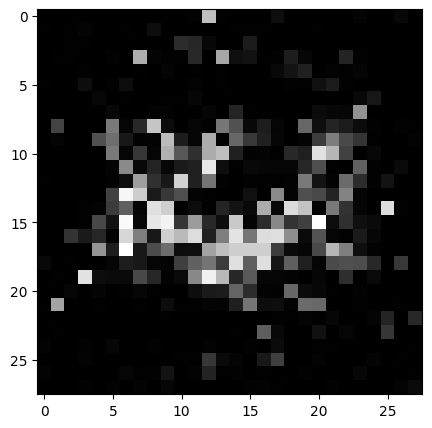

Epoch [21/200], Step [200/600], D Loss: 0.3278, G Loss: 5.4383, D(x): 0.98, D(G(z)): 0.16
Epoch [21/200], Step [400/600], D Loss: 0.4229, G Loss: 7.4830, D(x): 0.93, D(G(z)): 0.13
Epoch [21/200], Step [600/600], D Loss: 0.3056, G Loss: 5.0276, D(x): 0.90, D(G(z)): 0.07


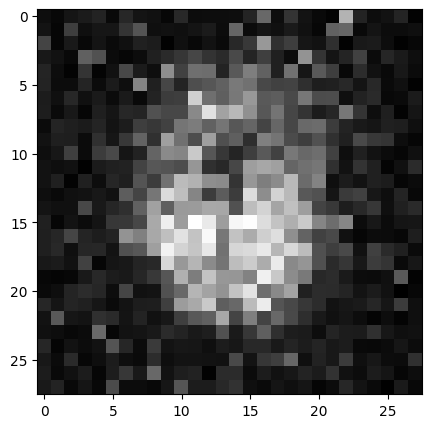

Epoch [22/200], Step [200/600], D Loss: 0.3391, G Loss: 3.9180, D(x): 0.91, D(G(z)): 0.10
Epoch [22/200], Step [400/600], D Loss: 0.2972, G Loss: 5.2337, D(x): 0.96, D(G(z)): 0.15
Epoch [22/200], Step [600/600], D Loss: 0.4296, G Loss: 4.6618, D(x): 0.83, D(G(z)): 0.04


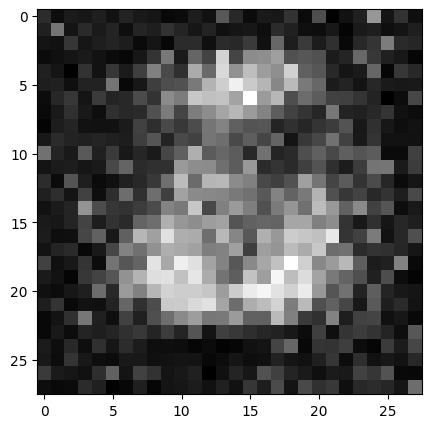

Epoch [23/200], Step [200/600], D Loss: 0.4472, G Loss: 3.1021, D(x): 0.88, D(G(z)): 0.10
Epoch [23/200], Step [400/600], D Loss: 0.4201, G Loss: 5.4036, D(x): 0.80, D(G(z)): 0.02
Epoch [23/200], Step [600/600], D Loss: 0.0478, G Loss: 3.6721, D(x): 0.99, D(G(z)): 0.04


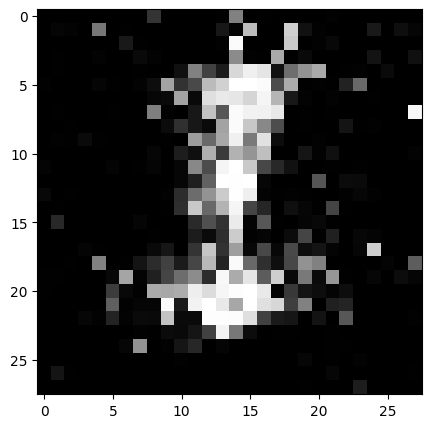

Epoch [24/200], Step [200/600], D Loss: 0.3446, G Loss: 4.0973, D(x): 0.93, D(G(z)): 0.14
Epoch [24/200], Step [400/600], D Loss: 0.3716, G Loss: 3.5673, D(x): 0.86, D(G(z)): 0.07
Epoch [24/200], Step [600/600], D Loss: 0.2758, G Loss: 4.7035, D(x): 0.93, D(G(z)): 0.09


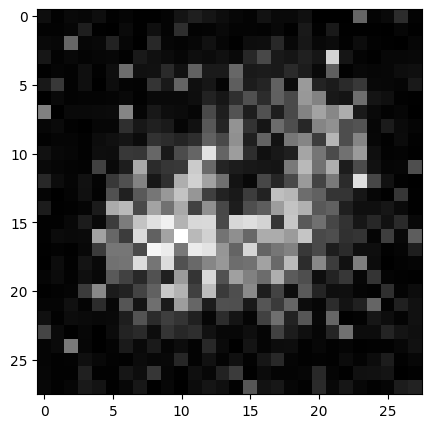

Epoch [25/200], Step [200/600], D Loss: 0.5441, G Loss: 4.0043, D(x): 0.95, D(G(z)): 0.25
Epoch [25/200], Step [400/600], D Loss: 0.1308, G Loss: 5.4035, D(x): 0.93, D(G(z)): 0.03
Epoch [25/200], Step [600/600], D Loss: 0.2078, G Loss: 8.4344, D(x): 0.93, D(G(z)): 0.04


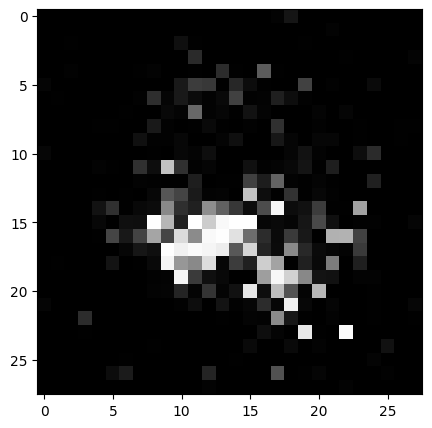

Epoch [26/200], Step [200/600], D Loss: 0.4415, G Loss: 5.0811, D(x): 0.84, D(G(z)): 0.02
Epoch [26/200], Step [400/600], D Loss: 0.2874, G Loss: 5.6813, D(x): 0.91, D(G(z)): 0.05
Epoch [26/200], Step [600/600], D Loss: 0.1342, G Loss: 4.4570, D(x): 0.97, D(G(z)): 0.05


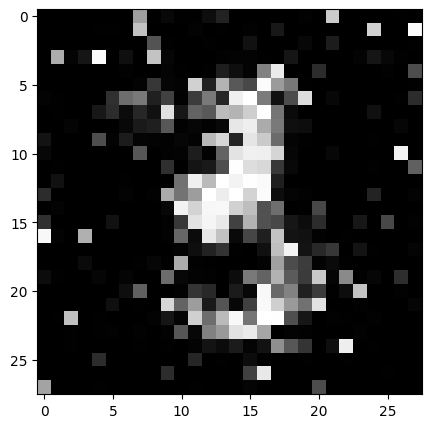

Epoch [27/200], Step [200/600], D Loss: 0.1416, G Loss: 4.5353, D(x): 0.94, D(G(z)): 0.03
Epoch [27/200], Step [400/600], D Loss: 0.3169, G Loss: 5.8201, D(x): 0.91, D(G(z)): 0.04
Epoch [27/200], Step [600/600], D Loss: 0.4208, G Loss: 4.5601, D(x): 0.97, D(G(z)): 0.22


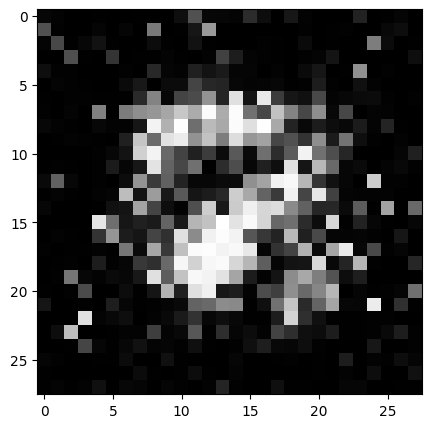

Epoch [28/200], Step [200/600], D Loss: 0.1551, G Loss: 5.5553, D(x): 0.96, D(G(z)): 0.07
Epoch [28/200], Step [400/600], D Loss: 0.2281, G Loss: 5.4446, D(x): 0.91, D(G(z)): 0.02
Epoch [28/200], Step [600/600], D Loss: 0.3459, G Loss: 4.7832, D(x): 0.96, D(G(z)): 0.17


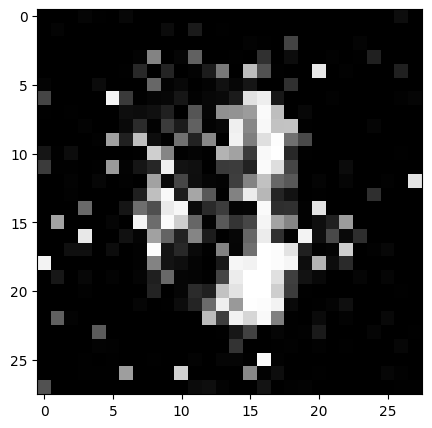

Epoch [29/200], Step [200/600], D Loss: 0.3664, G Loss: 5.4391, D(x): 0.88, D(G(z)): 0.08
Epoch [29/200], Step [400/600], D Loss: 0.4551, G Loss: 3.7353, D(x): 0.89, D(G(z)): 0.12
Epoch [29/200], Step [600/600], D Loss: 0.5493, G Loss: 3.6174, D(x): 0.91, D(G(z)): 0.18


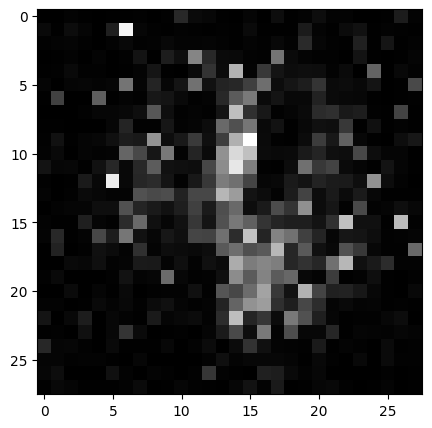

Epoch [30/200], Step [200/600], D Loss: 0.3106, G Loss: 5.0420, D(x): 0.89, D(G(z)): 0.03
Epoch [30/200], Step [400/600], D Loss: 0.4375, G Loss: 4.7061, D(x): 0.83, D(G(z)): 0.01
Epoch [30/200], Step [600/600], D Loss: 0.2829, G Loss: 3.6791, D(x): 0.90, D(G(z)): 0.04


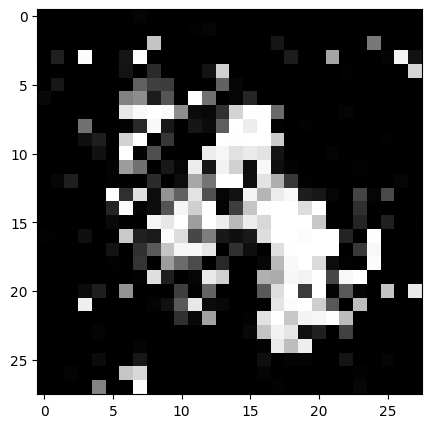

Epoch [31/200], Step [200/600], D Loss: 0.4106, G Loss: 4.3395, D(x): 0.85, D(G(z)): 0.05
Epoch [31/200], Step [400/600], D Loss: 0.2419, G Loss: 3.3415, D(x): 0.91, D(G(z)): 0.09
Epoch [31/200], Step [600/600], D Loss: 0.3668, G Loss: 3.5736, D(x): 0.90, D(G(z)): 0.12


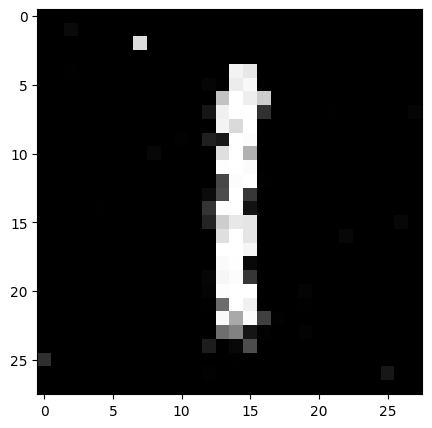

Epoch [32/200], Step [200/600], D Loss: 0.4078, G Loss: 2.9571, D(x): 0.86, D(G(z)): 0.09
Epoch [32/200], Step [400/600], D Loss: 0.3479, G Loss: 3.0413, D(x): 0.93, D(G(z)): 0.19
Epoch [32/200], Step [600/600], D Loss: 0.5136, G Loss: 2.8428, D(x): 0.84, D(G(z)): 0.12


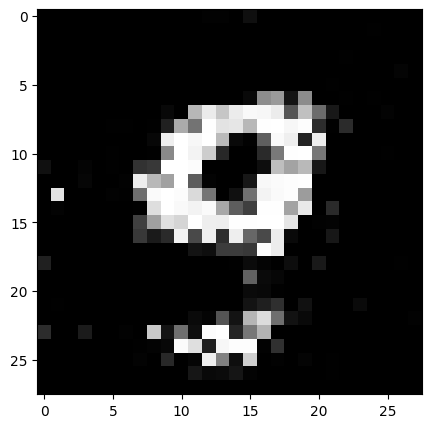

Epoch [33/200], Step [200/600], D Loss: 0.4228, G Loss: 3.0614, D(x): 0.88, D(G(z)): 0.12
Epoch [33/200], Step [400/600], D Loss: 0.4437, G Loss: 3.0538, D(x): 0.87, D(G(z)): 0.12
Epoch [33/200], Step [600/600], D Loss: 0.3758, G Loss: 5.0027, D(x): 0.93, D(G(z)): 0.18


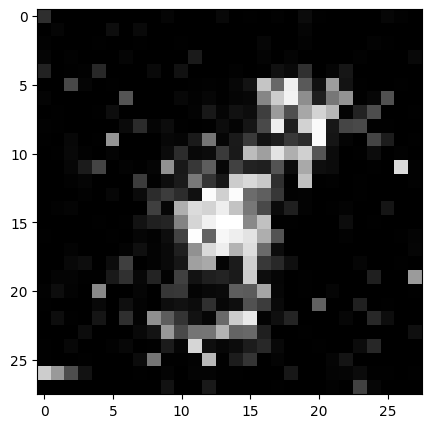

Epoch [34/200], Step [200/600], D Loss: 0.3501, G Loss: 3.5205, D(x): 0.89, D(G(z)): 0.10
Epoch [34/200], Step [400/600], D Loss: 0.2992, G Loss: 3.9002, D(x): 0.88, D(G(z)): 0.06
Epoch [34/200], Step [600/600], D Loss: 0.4388, G Loss: 3.4215, D(x): 0.87, D(G(z)): 0.10


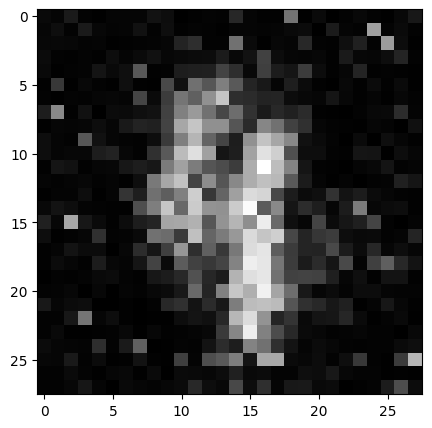

Epoch [35/200], Step [200/600], D Loss: 0.4021, G Loss: 4.3099, D(x): 0.93, D(G(z)): 0.15
Epoch [35/200], Step [400/600], D Loss: 0.2143, G Loss: 4.6826, D(x): 0.92, D(G(z)): 0.07
Epoch [35/200], Step [600/600], D Loss: 0.2243, G Loss: 5.3205, D(x): 0.95, D(G(z)): 0.09


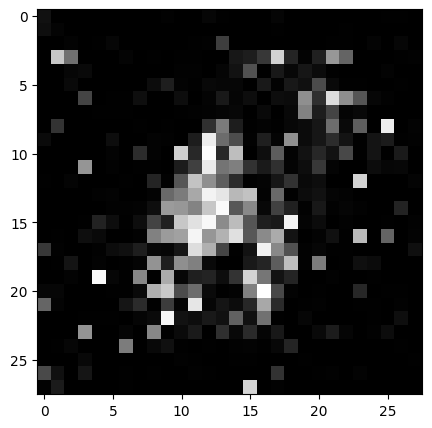

Epoch [36/200], Step [200/600], D Loss: 0.3028, G Loss: 4.7036, D(x): 0.89, D(G(z)): 0.07
Epoch [36/200], Step [400/600], D Loss: 0.2134, G Loss: 3.7154, D(x): 0.93, D(G(z)): 0.06
Epoch [36/200], Step [600/600], D Loss: 0.4996, G Loss: 3.1931, D(x): 0.92, D(G(z)): 0.22


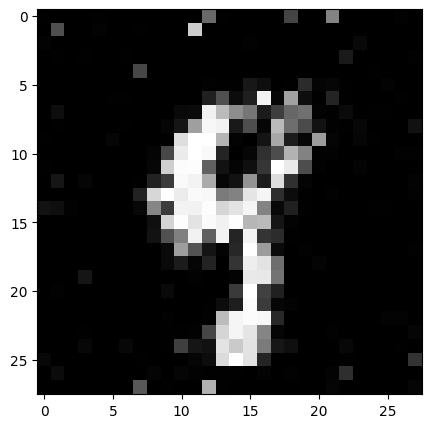

Epoch [37/200], Step [200/600], D Loss: 0.6867, G Loss: 3.4728, D(x): 0.76, D(G(z)): 0.06
Epoch [37/200], Step [400/600], D Loss: 0.5504, G Loss: 2.8439, D(x): 0.84, D(G(z)): 0.16
Epoch [37/200], Step [600/600], D Loss: 0.3950, G Loss: 3.0949, D(x): 0.89, D(G(z)): 0.13


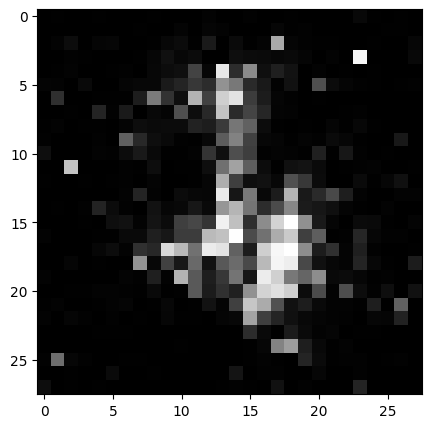

Epoch [38/200], Step [200/600], D Loss: 0.4962, G Loss: 2.5941, D(x): 0.96, D(G(z)): 0.24
Epoch [38/200], Step [400/600], D Loss: 0.4968, G Loss: 3.4292, D(x): 0.85, D(G(z)): 0.13
Epoch [38/200], Step [600/600], D Loss: 0.2036, G Loss: 4.2375, D(x): 0.95, D(G(z)): 0.10


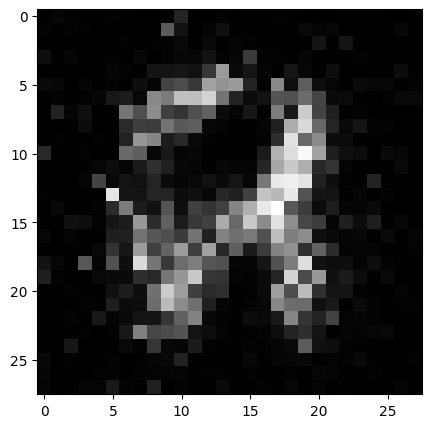

Epoch [39/200], Step [200/600], D Loss: 0.3075, G Loss: 4.9568, D(x): 0.89, D(G(z)): 0.11
Epoch [39/200], Step [400/600], D Loss: 0.4512, G Loss: 3.5207, D(x): 0.83, D(G(z)): 0.09
Epoch [39/200], Step [600/600], D Loss: 0.3285, G Loss: 3.3119, D(x): 0.89, D(G(z)): 0.12


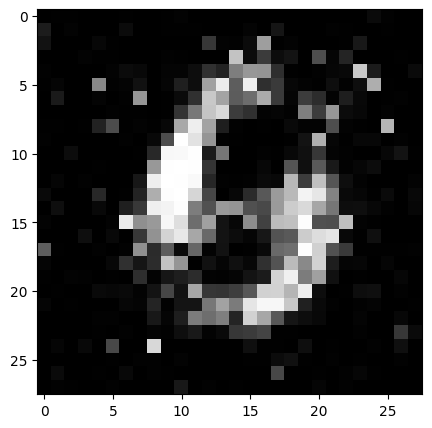

Epoch [40/200], Step [200/600], D Loss: 0.4671, G Loss: 2.5313, D(x): 0.87, D(G(z)): 0.17
Epoch [40/200], Step [400/600], D Loss: 0.3573, G Loss: 2.5668, D(x): 0.86, D(G(z)): 0.11
Epoch [40/200], Step [600/600], D Loss: 0.5425, G Loss: 2.7218, D(x): 0.81, D(G(z)): 0.11


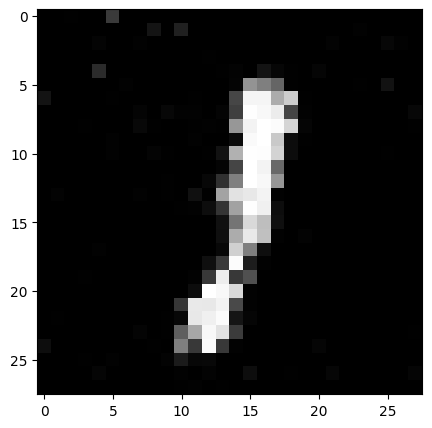

Epoch [41/200], Step [200/600], D Loss: 0.4933, G Loss: 3.7829, D(x): 0.84, D(G(z)): 0.14
Epoch [41/200], Step [400/600], D Loss: 0.3925, G Loss: 2.4192, D(x): 0.88, D(G(z)): 0.15
Epoch [41/200], Step [600/600], D Loss: 0.5794, G Loss: 3.3166, D(x): 0.88, D(G(z)): 0.22


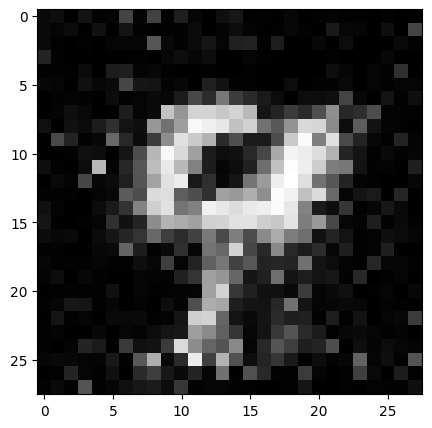

Epoch [42/200], Step [200/600], D Loss: 0.5687, G Loss: 3.0663, D(x): 0.79, D(G(z)): 0.07
Epoch [42/200], Step [400/600], D Loss: 0.3850, G Loss: 3.0488, D(x): 0.89, D(G(z)): 0.15
Epoch [42/200], Step [600/600], D Loss: 0.5578, G Loss: 2.3440, D(x): 0.83, D(G(z)): 0.16


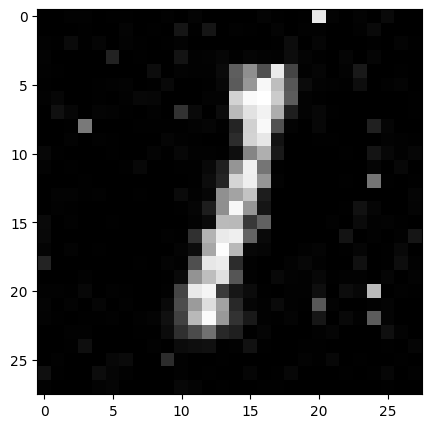

Epoch [43/200], Step [200/600], D Loss: 0.4174, G Loss: 3.0211, D(x): 0.91, D(G(z)): 0.19
Epoch [43/200], Step [400/600], D Loss: 0.5522, G Loss: 2.7222, D(x): 0.86, D(G(z)): 0.18
Epoch [43/200], Step [600/600], D Loss: 0.5997, G Loss: 3.0057, D(x): 0.78, D(G(z)): 0.07


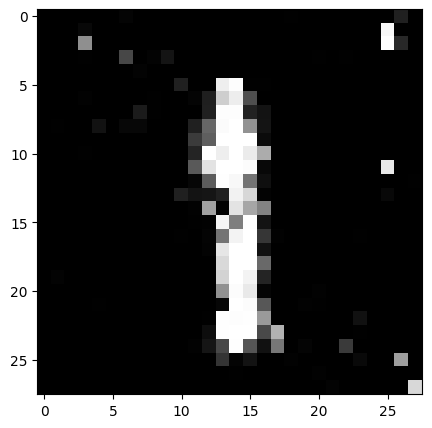

Epoch [44/200], Step [200/600], D Loss: 0.4148, G Loss: 2.7806, D(x): 0.91, D(G(z)): 0.20
Epoch [44/200], Step [400/600], D Loss: 0.3426, G Loss: 4.3710, D(x): 0.89, D(G(z)): 0.09
Epoch [44/200], Step [600/600], D Loss: 0.2215, G Loss: 3.7699, D(x): 0.96, D(G(z)): 0.13


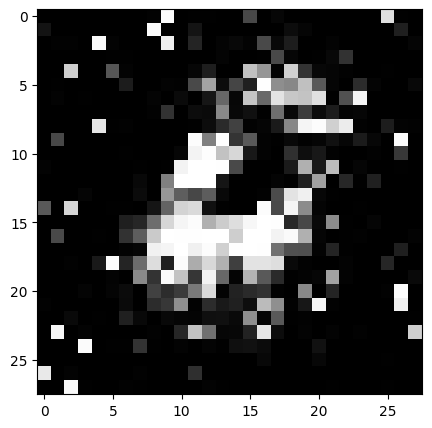

Epoch [45/200], Step [200/600], D Loss: 0.3827, G Loss: 4.7975, D(x): 0.91, D(G(z)): 0.15
Epoch [45/200], Step [400/600], D Loss: 0.3629, G Loss: 5.7913, D(x): 0.83, D(G(z)): 0.03
Epoch [45/200], Step [600/600], D Loss: 0.3730, G Loss: 4.5466, D(x): 0.96, D(G(z)): 0.21


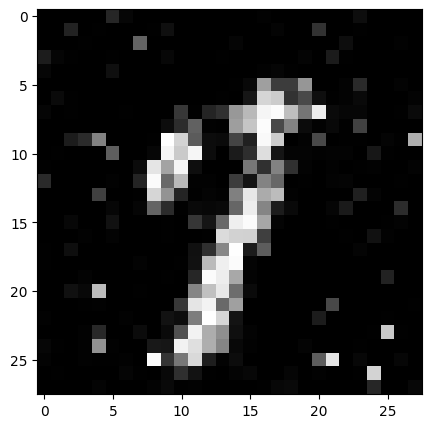

Epoch [46/200], Step [200/600], D Loss: 0.4883, G Loss: 2.9936, D(x): 0.95, D(G(z)): 0.25
Epoch [46/200], Step [400/600], D Loss: 0.3587, G Loss: 3.2622, D(x): 0.91, D(G(z)): 0.15
Epoch [46/200], Step [600/600], D Loss: 0.4685, G Loss: 3.5550, D(x): 0.84, D(G(z)): 0.07


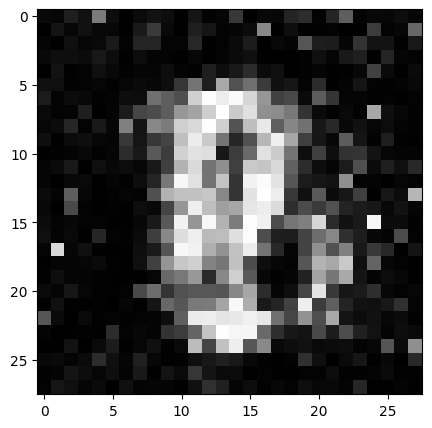

Epoch [47/200], Step [200/600], D Loss: 0.4054, G Loss: 4.0619, D(x): 0.86, D(G(z)): 0.08
Epoch [47/200], Step [400/600], D Loss: 0.4549, G Loss: 2.7762, D(x): 0.91, D(G(z)): 0.20
Epoch [47/200], Step [600/600], D Loss: 0.4695, G Loss: 3.5069, D(x): 0.86, D(G(z)): 0.17


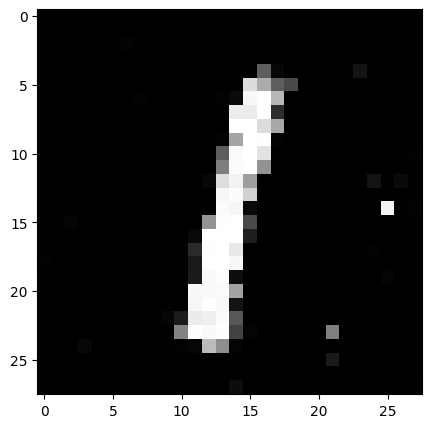

Epoch [48/200], Step [200/600], D Loss: 0.4156, G Loss: 3.6598, D(x): 0.88, D(G(z)): 0.15
Epoch [48/200], Step [400/600], D Loss: 0.4913, G Loss: 3.8622, D(x): 0.82, D(G(z)): 0.11
Epoch [48/200], Step [600/600], D Loss: 0.5126, G Loss: 2.3900, D(x): 0.82, D(G(z)): 0.16


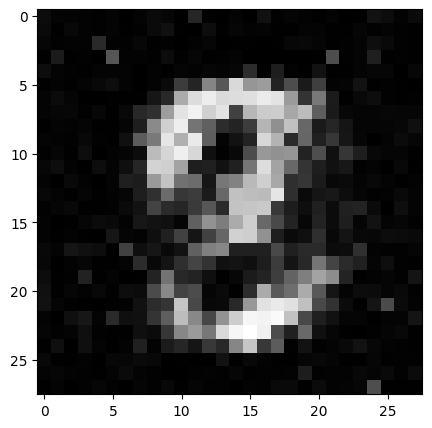

Epoch [49/200], Step [200/600], D Loss: 0.3476, G Loss: 3.1118, D(x): 0.93, D(G(z)): 0.19
Epoch [49/200], Step [400/600], D Loss: 0.6002, G Loss: 2.9652, D(x): 0.86, D(G(z)): 0.23
Epoch [49/200], Step [600/600], D Loss: 0.6508, G Loss: 2.1081, D(x): 0.77, D(G(z)): 0.18


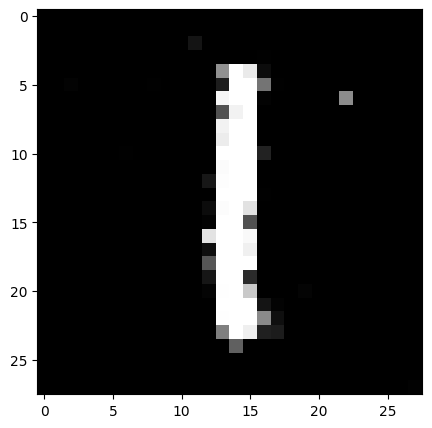

Epoch [50/200], Step [200/600], D Loss: 0.7272, G Loss: 3.2135, D(x): 0.73, D(G(z)): 0.11
Epoch [50/200], Step [400/600], D Loss: 0.4111, G Loss: 3.1079, D(x): 0.91, D(G(z)): 0.18
Epoch [50/200], Step [600/600], D Loss: 0.5929, G Loss: 1.6723, D(x): 0.85, D(G(z)): 0.25


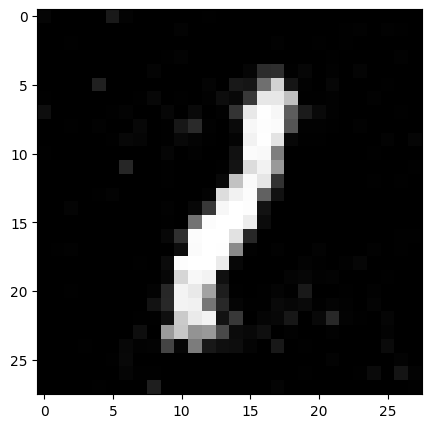

Epoch [51/200], Step [200/600], D Loss: 0.4907, G Loss: 3.0942, D(x): 0.81, D(G(z)): 0.11
Epoch [51/200], Step [400/600], D Loss: 0.6891, G Loss: 1.8255, D(x): 0.90, D(G(z)): 0.34
Epoch [51/200], Step [600/600], D Loss: 0.4254, G Loss: 2.8950, D(x): 0.88, D(G(z)): 0.19


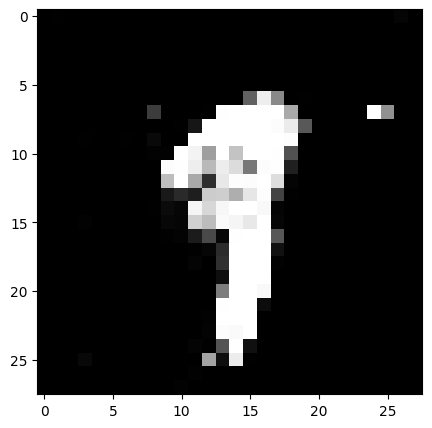

Epoch [52/200], Step [200/600], D Loss: 0.5162, G Loss: 1.6925, D(x): 0.87, D(G(z)): 0.20
Epoch [52/200], Step [400/600], D Loss: 0.6015, G Loss: 1.9862, D(x): 0.81, D(G(z)): 0.19
Epoch [52/200], Step [600/600], D Loss: 0.5858, G Loss: 3.3881, D(x): 0.81, D(G(z)): 0.15


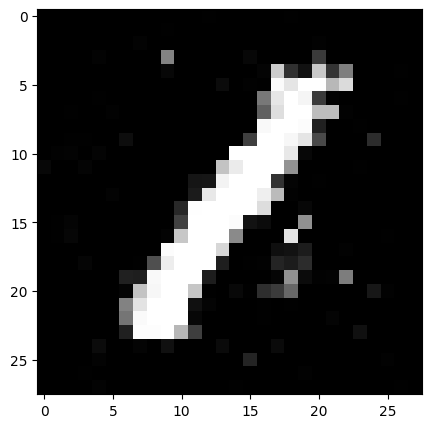

Epoch [53/200], Step [200/600], D Loss: 0.5534, G Loss: 2.8911, D(x): 0.79, D(G(z)): 0.14
Epoch [53/200], Step [400/600], D Loss: 0.4203, G Loss: 2.4692, D(x): 0.84, D(G(z)): 0.15
Epoch [53/200], Step [600/600], D Loss: 0.6565, G Loss: 1.9009, D(x): 0.82, D(G(z)): 0.25


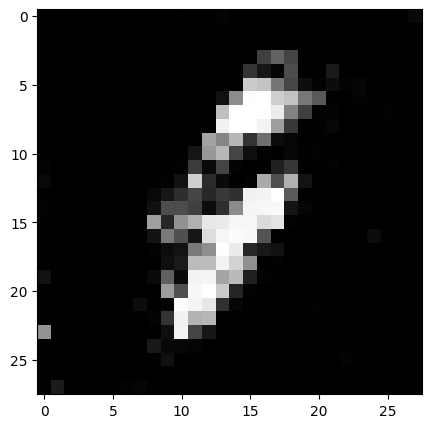

Epoch [54/200], Step [200/600], D Loss: 0.5482, G Loss: 2.8091, D(x): 0.79, D(G(z)): 0.12
Epoch [54/200], Step [400/600], D Loss: 0.6892, G Loss: 2.6295, D(x): 0.71, D(G(z)): 0.10
Epoch [54/200], Step [600/600], D Loss: 0.4321, G Loss: 2.7807, D(x): 0.90, D(G(z)): 0.21


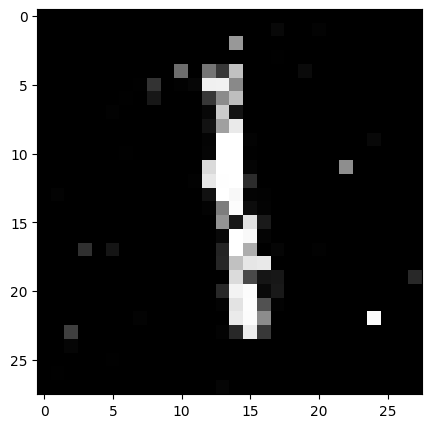

Epoch [55/200], Step [200/600], D Loss: 0.7318, G Loss: 2.5467, D(x): 0.83, D(G(z)): 0.25
Epoch [55/200], Step [400/600], D Loss: 0.4792, G Loss: 3.3059, D(x): 0.83, D(G(z)): 0.13
Epoch [55/200], Step [600/600], D Loss: 0.3184, G Loss: 3.2504, D(x): 0.91, D(G(z)): 0.13


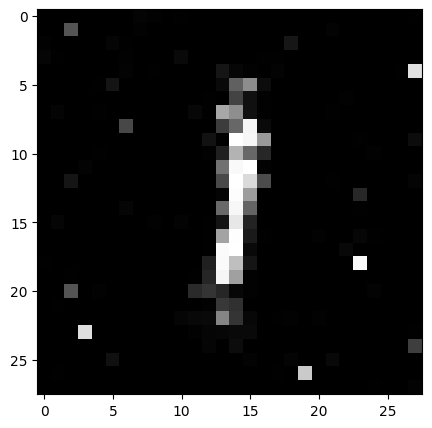

Epoch [56/200], Step [200/600], D Loss: 0.3813, G Loss: 3.0399, D(x): 0.92, D(G(z)): 0.19
Epoch [56/200], Step [400/600], D Loss: 0.6118, G Loss: 2.5232, D(x): 0.94, D(G(z)): 0.30
Epoch [56/200], Step [600/600], D Loss: 0.4297, G Loss: 3.1330, D(x): 0.91, D(G(z)): 0.19


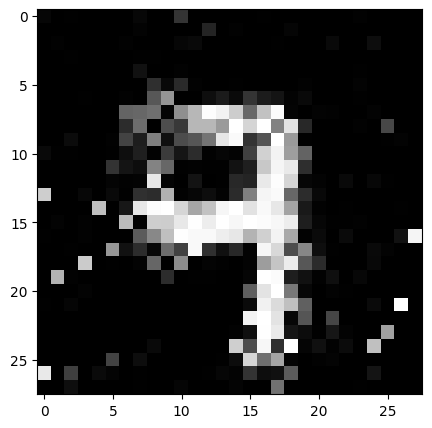

Epoch [57/200], Step [200/600], D Loss: 0.3373, G Loss: 3.7503, D(x): 0.87, D(G(z)): 0.06
Epoch [57/200], Step [400/600], D Loss: 0.3770, G Loss: 3.4628, D(x): 0.85, D(G(z)): 0.10
Epoch [57/200], Step [600/600], D Loss: 0.4468, G Loss: 3.9028, D(x): 0.81, D(G(z)): 0.06


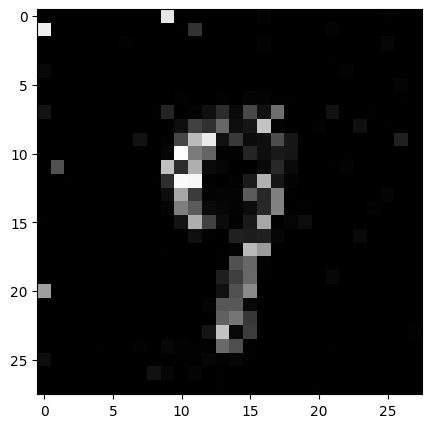

Epoch [58/200], Step [200/600], D Loss: 0.5085, G Loss: 2.8055, D(x): 0.80, D(G(z)): 0.10
Epoch [58/200], Step [400/600], D Loss: 0.4806, G Loss: 3.3584, D(x): 0.81, D(G(z)): 0.09
Epoch [58/200], Step [600/600], D Loss: 0.5796, G Loss: 2.8819, D(x): 0.78, D(G(z)): 0.11


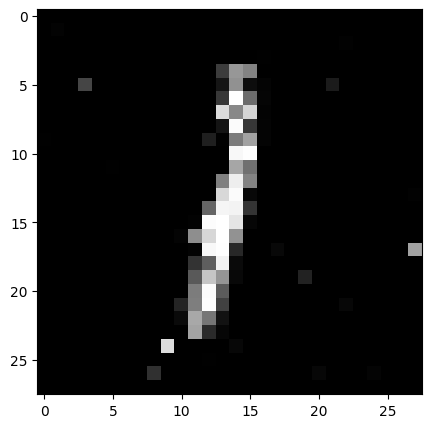

Epoch [59/200], Step [200/600], D Loss: 0.5534, G Loss: 2.7363, D(x): 0.81, D(G(z)): 0.16
Epoch [59/200], Step [400/600], D Loss: 0.7001, G Loss: 2.8539, D(x): 0.75, D(G(z)): 0.12
Epoch [59/200], Step [600/600], D Loss: 0.4989, G Loss: 2.5592, D(x): 0.84, D(G(z)): 0.17


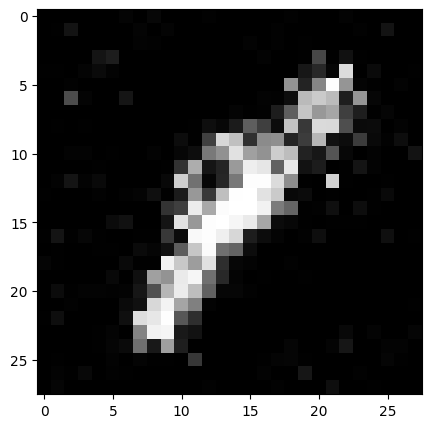

Epoch [60/200], Step [200/600], D Loss: 0.5649, G Loss: 2.7876, D(x): 0.82, D(G(z)): 0.19
Epoch [60/200], Step [400/600], D Loss: 0.6359, G Loss: 3.1212, D(x): 0.73, D(G(z)): 0.09
Epoch [60/200], Step [600/600], D Loss: 0.6539, G Loss: 2.1738, D(x): 0.80, D(G(z)): 0.20


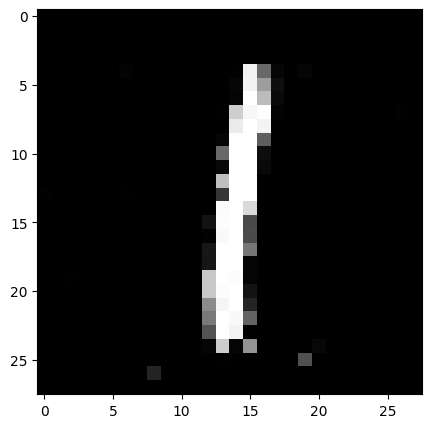

Epoch [61/200], Step [200/600], D Loss: 0.8059, G Loss: 2.0688, D(x): 0.77, D(G(z)): 0.23
Epoch [61/200], Step [400/600], D Loss: 0.4822, G Loss: 2.5834, D(x): 0.78, D(G(z)): 0.11
Epoch [61/200], Step [600/600], D Loss: 0.4936, G Loss: 2.2649, D(x): 0.80, D(G(z)): 0.13


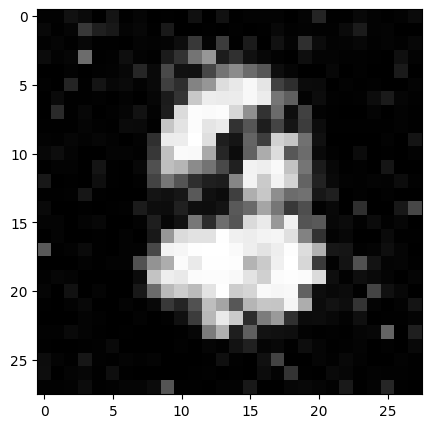

Epoch [62/200], Step [200/600], D Loss: 0.5665, G Loss: 1.6535, D(x): 0.87, D(G(z)): 0.26
Epoch [62/200], Step [400/600], D Loss: 0.5572, G Loss: 2.9864, D(x): 0.79, D(G(z)): 0.16
Epoch [62/200], Step [600/600], D Loss: 0.6371, G Loss: 2.8360, D(x): 0.74, D(G(z)): 0.13


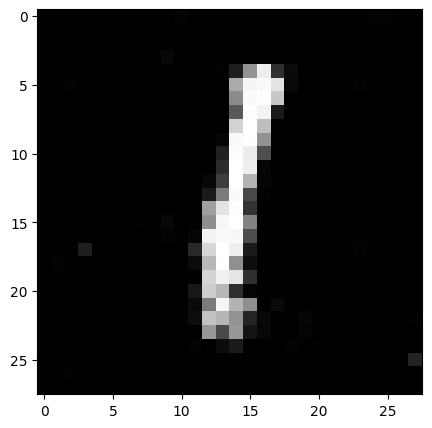

Epoch [63/200], Step [200/600], D Loss: 0.5856, G Loss: 2.4868, D(x): 0.87, D(G(z)): 0.26
Epoch [63/200], Step [400/600], D Loss: 0.7831, G Loss: 1.8721, D(x): 0.82, D(G(z)): 0.28
Epoch [63/200], Step [600/600], D Loss: 0.5470, G Loss: 2.1849, D(x): 0.80, D(G(z)): 0.18


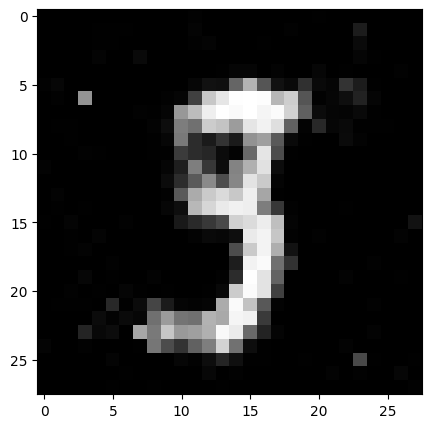

Epoch [64/200], Step [200/600], D Loss: 0.6791, G Loss: 2.6663, D(x): 0.85, D(G(z)): 0.31
Epoch [64/200], Step [400/600], D Loss: 0.5956, G Loss: 1.5836, D(x): 0.78, D(G(z)): 0.19
Epoch [64/200], Step [600/600], D Loss: 0.6661, G Loss: 2.1037, D(x): 0.77, D(G(z)): 0.21


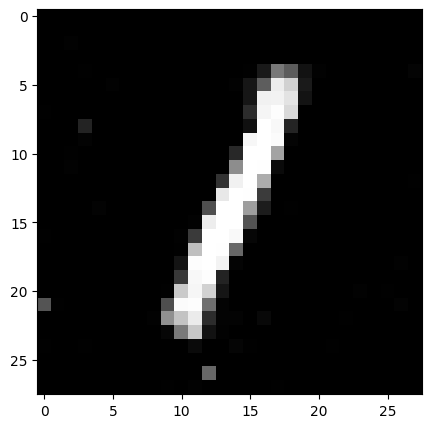

Epoch [65/200], Step [200/600], D Loss: 0.6741, G Loss: 1.9651, D(x): 0.82, D(G(z)): 0.27
Epoch [65/200], Step [400/600], D Loss: 0.5833, G Loss: 2.3941, D(x): 0.85, D(G(z)): 0.25
Epoch [65/200], Step [600/600], D Loss: 0.4639, G Loss: 2.4633, D(x): 0.84, D(G(z)): 0.18


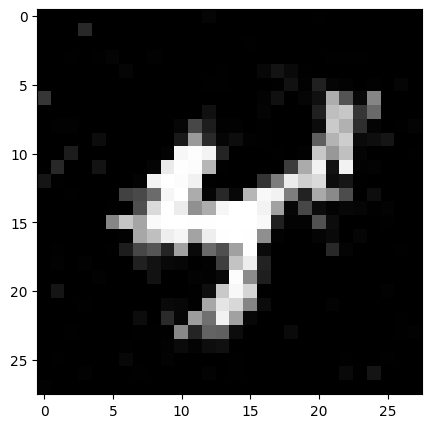

Epoch [66/200], Step [200/600], D Loss: 0.6766, G Loss: 2.0820, D(x): 0.76, D(G(z)): 0.20
Epoch [66/200], Step [400/600], D Loss: 0.7370, G Loss: 2.3753, D(x): 0.80, D(G(z)): 0.27
Epoch [66/200], Step [600/600], D Loss: 0.8015, G Loss: 2.0481, D(x): 0.78, D(G(z)): 0.27


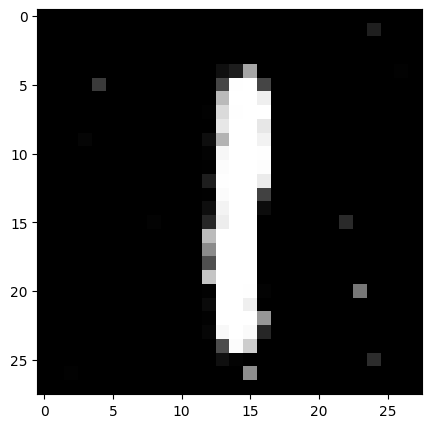

Epoch [67/200], Step [200/600], D Loss: 0.9039, G Loss: 1.9803, D(x): 0.79, D(G(z)): 0.32
Epoch [67/200], Step [400/600], D Loss: 0.7721, G Loss: 1.9145, D(x): 0.77, D(G(z)): 0.26
Epoch [67/200], Step [600/600], D Loss: 0.5321, G Loss: 3.0495, D(x): 0.78, D(G(z)): 0.13


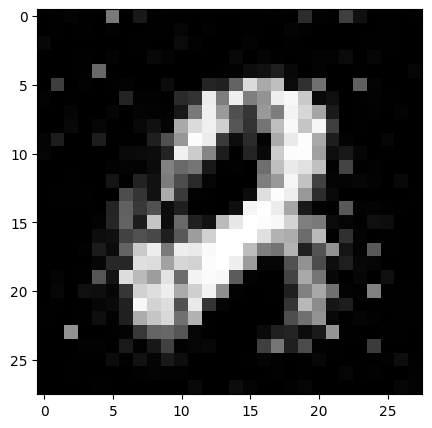

Epoch [68/200], Step [200/600], D Loss: 0.7259, G Loss: 2.0739, D(x): 0.82, D(G(z)): 0.28
Epoch [68/200], Step [400/600], D Loss: 0.4605, G Loss: 2.3537, D(x): 0.84, D(G(z)): 0.15
Epoch [68/200], Step [600/600], D Loss: 0.6944, G Loss: 2.4500, D(x): 0.75, D(G(z)): 0.18


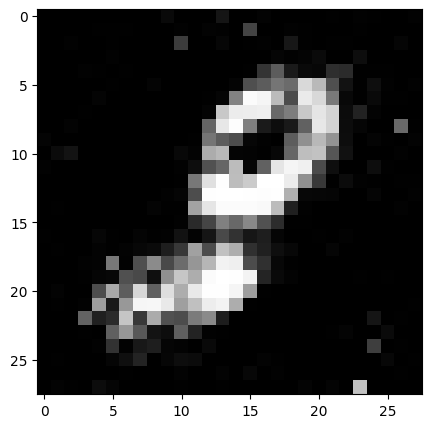

Epoch [69/200], Step [200/600], D Loss: 0.7079, G Loss: 2.2153, D(x): 0.84, D(G(z)): 0.28
Epoch [69/200], Step [400/600], D Loss: 0.9884, G Loss: 2.2424, D(x): 0.80, D(G(z)): 0.35
Epoch [69/200], Step [600/600], D Loss: 0.6334, G Loss: 1.7769, D(x): 0.88, D(G(z)): 0.31


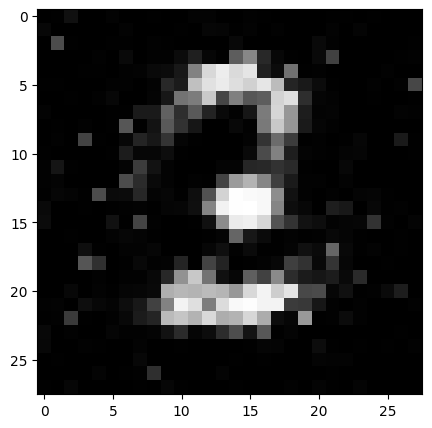

Epoch [70/200], Step [200/600], D Loss: 0.7666, G Loss: 1.9078, D(x): 0.69, D(G(z)): 0.16
Epoch [70/200], Step [400/600], D Loss: 0.5825, G Loss: 1.9983, D(x): 0.83, D(G(z)): 0.24
Epoch [70/200], Step [600/600], D Loss: 0.6298, G Loss: 2.6310, D(x): 0.81, D(G(z)): 0.22


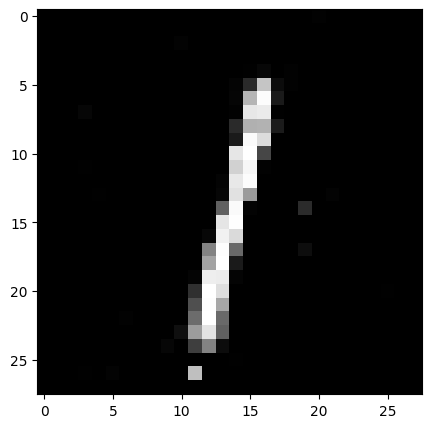

Epoch [71/200], Step [200/600], D Loss: 0.5974, G Loss: 2.5097, D(x): 0.78, D(G(z)): 0.18
Epoch [71/200], Step [400/600], D Loss: 0.6640, G Loss: 2.3384, D(x): 0.83, D(G(z)): 0.23
Epoch [71/200], Step [600/600], D Loss: 0.5826, G Loss: 2.7171, D(x): 0.84, D(G(z)): 0.24


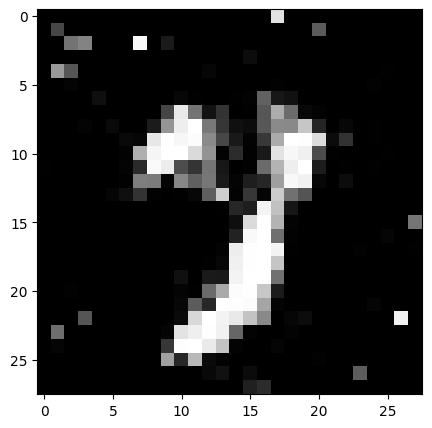

Epoch [72/200], Step [200/600], D Loss: 0.8115, G Loss: 1.9801, D(x): 0.75, D(G(z)): 0.26
Epoch [72/200], Step [400/600], D Loss: 0.4748, G Loss: 2.7510, D(x): 0.85, D(G(z)): 0.19
Epoch [72/200], Step [600/600], D Loss: 0.6756, G Loss: 3.0413, D(x): 0.81, D(G(z)): 0.22


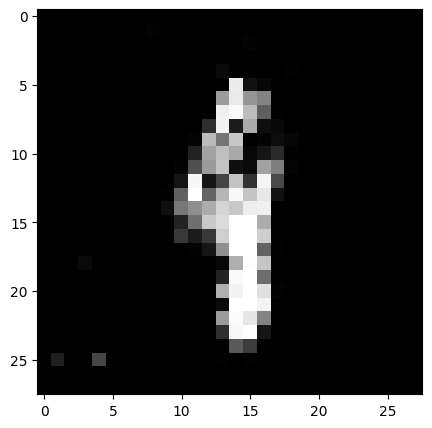

Epoch [73/200], Step [200/600], D Loss: 0.7079, G Loss: 2.4809, D(x): 0.82, D(G(z)): 0.25
Epoch [73/200], Step [400/600], D Loss: 0.6232, G Loss: 1.9440, D(x): 0.77, D(G(z)): 0.20
Epoch [73/200], Step [600/600], D Loss: 0.6497, G Loss: 1.8899, D(x): 0.79, D(G(z)): 0.22


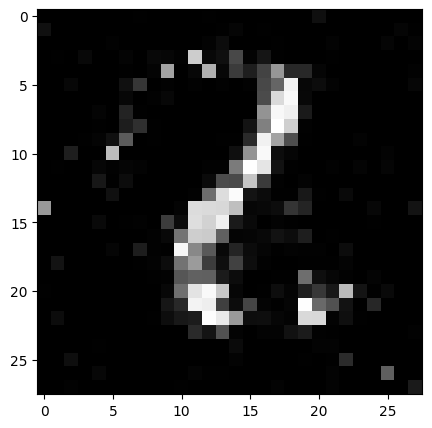

Epoch [74/200], Step [200/600], D Loss: 0.7050, G Loss: 1.7924, D(x): 0.84, D(G(z)): 0.32
Epoch [74/200], Step [400/600], D Loss: 0.6690, G Loss: 1.8984, D(x): 0.80, D(G(z)): 0.20
Epoch [74/200], Step [600/600], D Loss: 0.7087, G Loss: 2.0654, D(x): 0.76, D(G(z)): 0.22


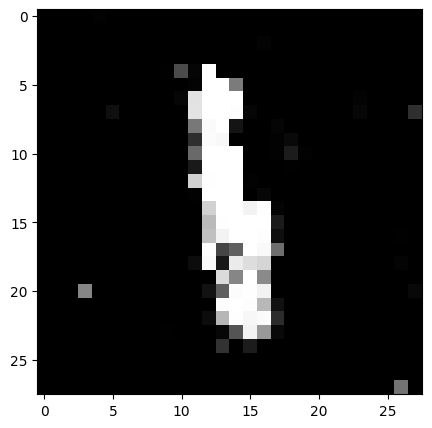

Epoch [75/200], Step [200/600], D Loss: 0.6327, G Loss: 2.4866, D(x): 0.81, D(G(z)): 0.24
Epoch [75/200], Step [400/600], D Loss: 0.5827, G Loss: 2.2361, D(x): 0.79, D(G(z)): 0.18
Epoch [75/200], Step [600/600], D Loss: 0.7304, G Loss: 2.0583, D(x): 0.81, D(G(z)): 0.29


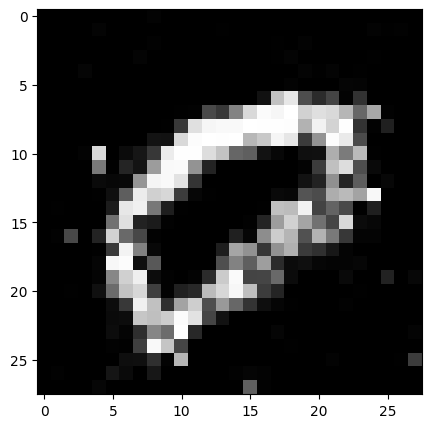

Epoch [76/200], Step [200/600], D Loss: 0.7176, G Loss: 1.9592, D(x): 0.75, D(G(z)): 0.21
Epoch [76/200], Step [400/600], D Loss: 0.8874, G Loss: 1.6935, D(x): 0.70, D(G(z)): 0.28
Epoch [76/200], Step [600/600], D Loss: 0.9912, G Loss: 2.2540, D(x): 0.77, D(G(z)): 0.35


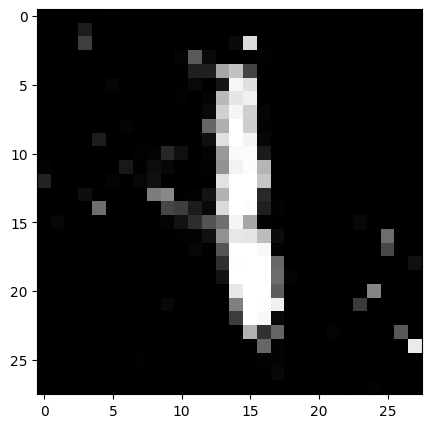

Epoch [77/200], Step [200/600], D Loss: 0.7102, G Loss: 2.2519, D(x): 0.78, D(G(z)): 0.23
Epoch [77/200], Step [400/600], D Loss: 0.7675, G Loss: 2.0536, D(x): 0.74, D(G(z)): 0.18
Epoch [77/200], Step [600/600], D Loss: 0.7277, G Loss: 2.2597, D(x): 0.80, D(G(z)): 0.25


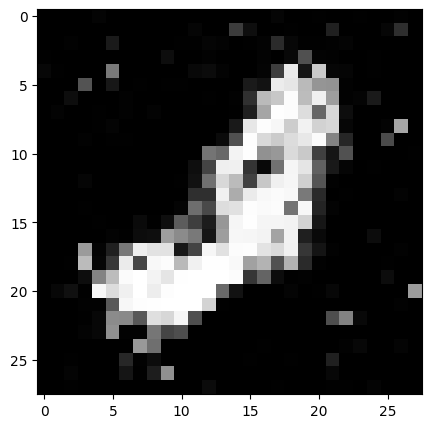

Epoch [78/200], Step [200/600], D Loss: 0.5421, G Loss: 2.9470, D(x): 0.87, D(G(z)): 0.25
Epoch [78/200], Step [400/600], D Loss: 0.7295, G Loss: 1.8513, D(x): 0.80, D(G(z)): 0.28
Epoch [78/200], Step [600/600], D Loss: 0.7628, G Loss: 2.0148, D(x): 0.77, D(G(z)): 0.23


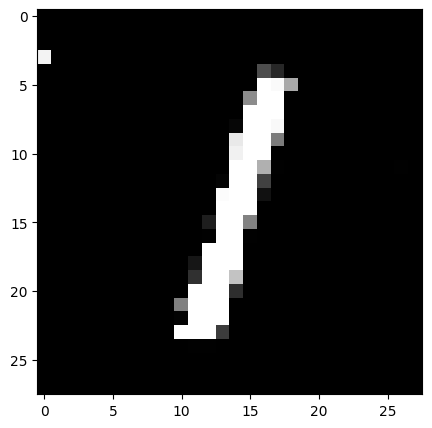

Epoch [79/200], Step [200/600], D Loss: 0.8472, G Loss: 2.1878, D(x): 0.73, D(G(z)): 0.25
Epoch [79/200], Step [400/600], D Loss: 0.7780, G Loss: 2.3219, D(x): 0.79, D(G(z)): 0.29
Epoch [79/200], Step [600/600], D Loss: 0.6863, G Loss: 2.6929, D(x): 0.82, D(G(z)): 0.24


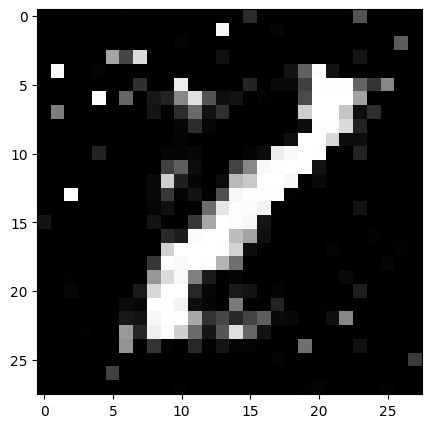

Epoch [80/200], Step [200/600], D Loss: 0.5664, G Loss: 2.3230, D(x): 0.78, D(G(z)): 0.18
Epoch [80/200], Step [400/600], D Loss: 0.7018, G Loss: 1.9771, D(x): 0.81, D(G(z)): 0.26
Epoch [80/200], Step [600/600], D Loss: 0.7454, G Loss: 2.2620, D(x): 0.70, D(G(z)): 0.17


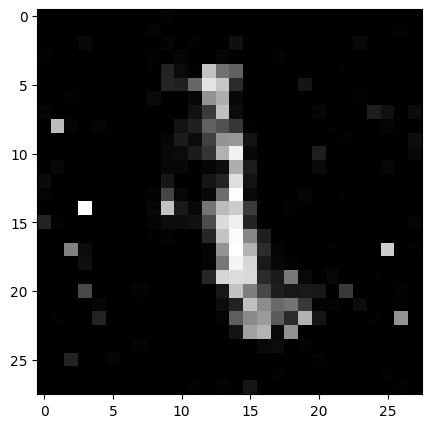

Epoch [81/200], Step [200/600], D Loss: 0.6294, G Loss: 2.0640, D(x): 0.84, D(G(z)): 0.28
Epoch [81/200], Step [400/600], D Loss: 0.5490, G Loss: 2.3439, D(x): 0.77, D(G(z)): 0.15
Epoch [81/200], Step [600/600], D Loss: 0.6351, G Loss: 2.1902, D(x): 0.78, D(G(z)): 0.22


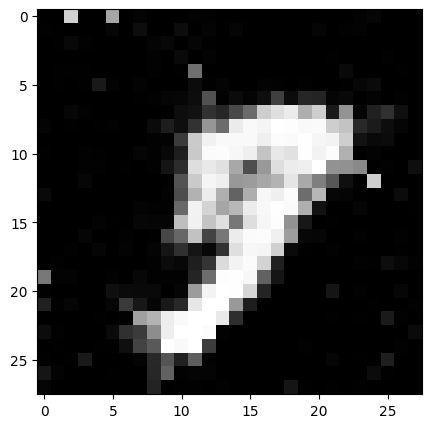

Epoch [82/200], Step [200/600], D Loss: 0.6173, G Loss: 2.1867, D(x): 0.79, D(G(z)): 0.18
Epoch [82/200], Step [400/600], D Loss: 0.7414, G Loss: 2.4177, D(x): 0.77, D(G(z)): 0.27
Epoch [82/200], Step [600/600], D Loss: 0.8250, G Loss: 1.8515, D(x): 0.77, D(G(z)): 0.29


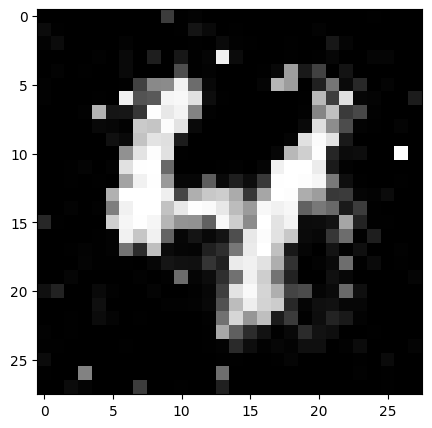

Epoch [83/200], Step [200/600], D Loss: 0.6407, G Loss: 2.8125, D(x): 0.75, D(G(z)): 0.16
Epoch [83/200], Step [400/600], D Loss: 0.9851, G Loss: 2.0960, D(x): 0.66, D(G(z)): 0.23
Epoch [83/200], Step [600/600], D Loss: 0.8239, G Loss: 1.9405, D(x): 0.78, D(G(z)): 0.29


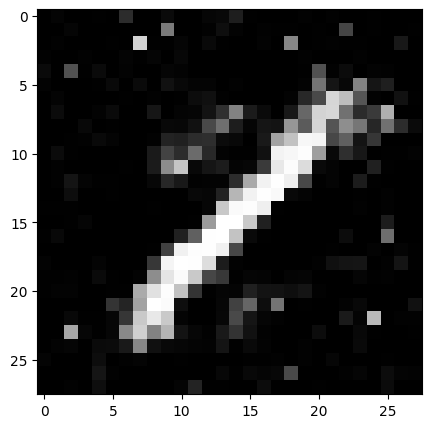

Epoch [84/200], Step [200/600], D Loss: 1.0174, G Loss: 1.8047, D(x): 0.81, D(G(z)): 0.40
Epoch [84/200], Step [400/600], D Loss: 0.5810, G Loss: 2.3702, D(x): 0.82, D(G(z)): 0.22
Epoch [84/200], Step [600/600], D Loss: 0.7220, G Loss: 2.3597, D(x): 0.71, D(G(z)): 0.16


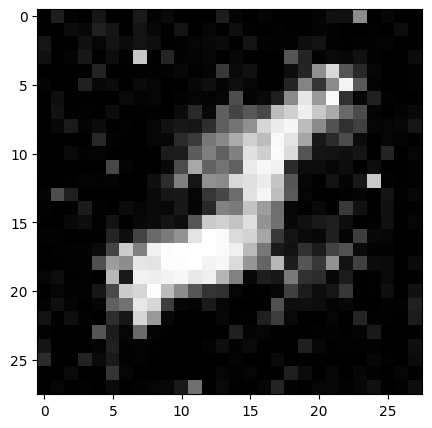

Epoch [85/200], Step [200/600], D Loss: 0.7200, G Loss: 2.2576, D(x): 0.80, D(G(z)): 0.28
Epoch [85/200], Step [400/600], D Loss: 0.7747, G Loss: 2.2798, D(x): 0.77, D(G(z)): 0.25
Epoch [85/200], Step [600/600], D Loss: 0.5512, G Loss: 2.3851, D(x): 0.76, D(G(z)): 0.16


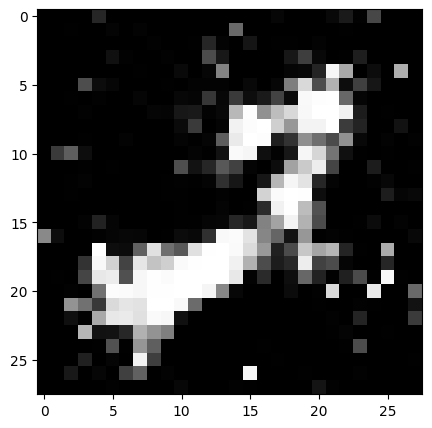

Epoch [86/200], Step [200/600], D Loss: 0.7413, G Loss: 2.0854, D(x): 0.73, D(G(z)): 0.23
Epoch [86/200], Step [400/600], D Loss: 0.7265, G Loss: 1.6620, D(x): 0.81, D(G(z)): 0.29
Epoch [86/200], Step [600/600], D Loss: 0.7997, G Loss: 2.5308, D(x): 0.72, D(G(z)): 0.21


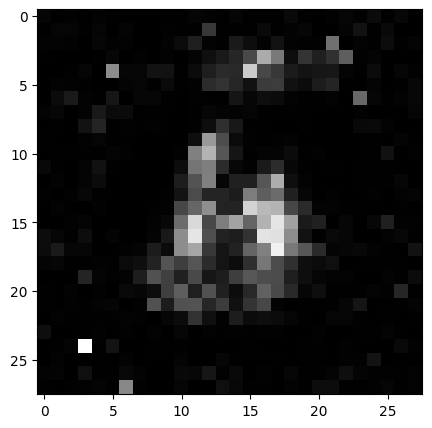

Epoch [87/200], Step [200/600], D Loss: 0.7071, G Loss: 2.2052, D(x): 0.76, D(G(z)): 0.22
Epoch [87/200], Step [400/600], D Loss: 0.6813, G Loss: 2.2663, D(x): 0.75, D(G(z)): 0.19
Epoch [87/200], Step [600/600], D Loss: 0.8334, G Loss: 1.8272, D(x): 0.69, D(G(z)): 0.20


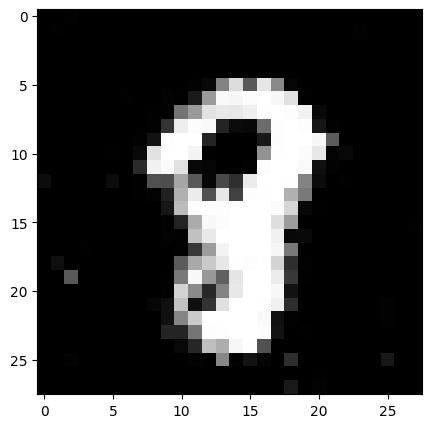

Epoch [88/200], Step [200/600], D Loss: 0.7661, G Loss: 2.1668, D(x): 0.76, D(G(z)): 0.25
Epoch [88/200], Step [400/600], D Loss: 0.8949, G Loss: 1.5980, D(x): 0.74, D(G(z)): 0.32
Epoch [88/200], Step [600/600], D Loss: 0.8905, G Loss: 1.6557, D(x): 0.68, D(G(z)): 0.26


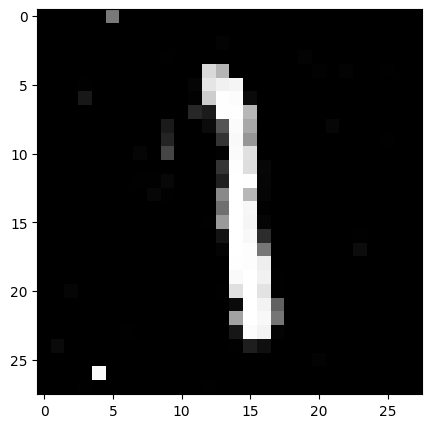

Epoch [89/200], Step [200/600], D Loss: 0.7790, G Loss: 2.0293, D(x): 0.84, D(G(z)): 0.34
Epoch [89/200], Step [400/600], D Loss: 0.7667, G Loss: 1.8368, D(x): 0.78, D(G(z)): 0.29
Epoch [89/200], Step [600/600], D Loss: 0.6203, G Loss: 2.2649, D(x): 0.73, D(G(z)): 0.14


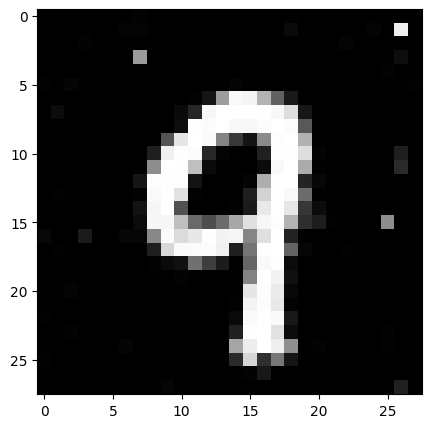

Epoch [90/200], Step [200/600], D Loss: 0.7352, G Loss: 2.4639, D(x): 0.72, D(G(z)): 0.18
Epoch [90/200], Step [400/600], D Loss: 0.6686, G Loss: 1.8259, D(x): 0.84, D(G(z)): 0.31
Epoch [90/200], Step [600/600], D Loss: 0.7301, G Loss: 1.9836, D(x): 0.73, D(G(z)): 0.19


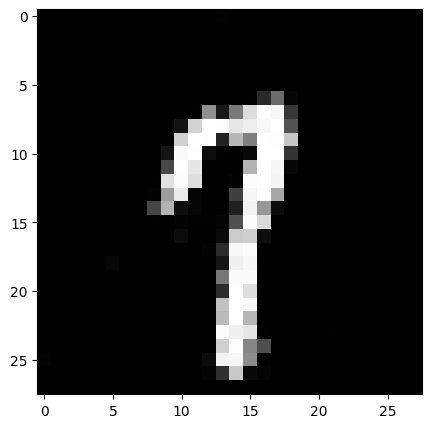

Epoch [91/200], Step [200/600], D Loss: 0.7777, G Loss: 1.5888, D(x): 0.72, D(G(z)): 0.23
Epoch [91/200], Step [400/600], D Loss: 1.0035, G Loss: 2.1408, D(x): 0.72, D(G(z)): 0.31
Epoch [91/200], Step [600/600], D Loss: 0.8493, G Loss: 2.1316, D(x): 0.69, D(G(z)): 0.20


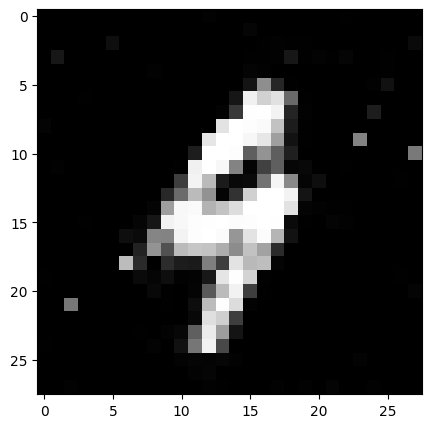

Epoch [92/200], Step [200/600], D Loss: 0.8861, G Loss: 1.7084, D(x): 0.70, D(G(z)): 0.24
Epoch [92/200], Step [400/600], D Loss: 0.6174, G Loss: 2.0550, D(x): 0.79, D(G(z)): 0.21
Epoch [92/200], Step [600/600], D Loss: 0.7078, G Loss: 1.8822, D(x): 0.70, D(G(z)): 0.17


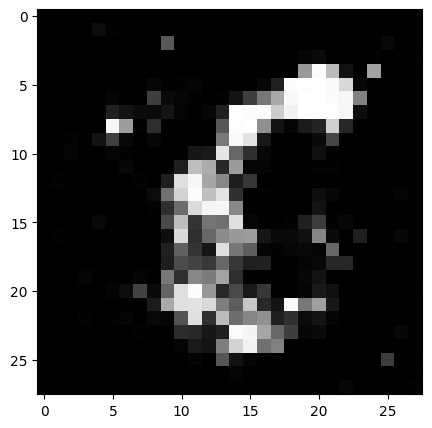

Epoch [93/200], Step [200/600], D Loss: 0.7529, G Loss: 1.8165, D(x): 0.77, D(G(z)): 0.27
Epoch [93/200], Step [400/600], D Loss: 0.8078, G Loss: 1.5243, D(x): 0.69, D(G(z)): 0.22
Epoch [93/200], Step [600/600], D Loss: 0.9095, G Loss: 1.6676, D(x): 0.73, D(G(z)): 0.29


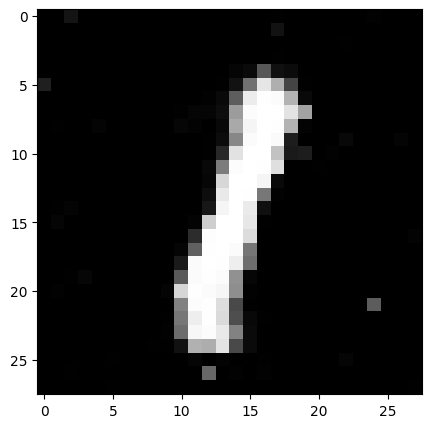

Epoch [94/200], Step [200/600], D Loss: 0.7069, G Loss: 2.2830, D(x): 0.78, D(G(z)): 0.26
Epoch [94/200], Step [400/600], D Loss: 0.8627, G Loss: 1.5352, D(x): 0.70, D(G(z)): 0.26
Epoch [94/200], Step [600/600], D Loss: 0.5103, G Loss: 2.1257, D(x): 0.84, D(G(z)): 0.22


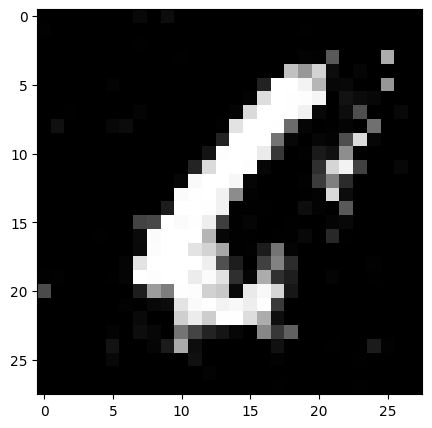

Epoch [95/200], Step [200/600], D Loss: 0.5150, G Loss: 1.8356, D(x): 0.83, D(G(z)): 0.21
Epoch [95/200], Step [400/600], D Loss: 0.7389, G Loss: 2.6351, D(x): 0.73, D(G(z)): 0.21
Epoch [95/200], Step [600/600], D Loss: 0.7065, G Loss: 1.9522, D(x): 0.74, D(G(z)): 0.22


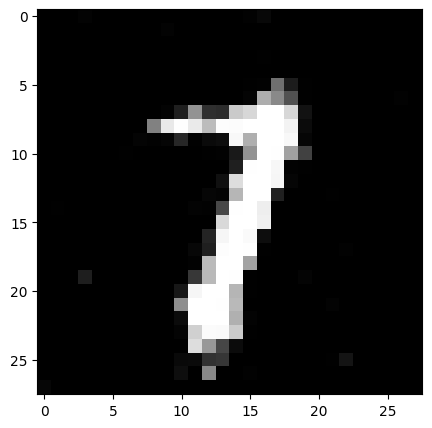

Epoch [96/200], Step [200/600], D Loss: 0.6893, G Loss: 1.7513, D(x): 0.79, D(G(z)): 0.28
Epoch [96/200], Step [400/600], D Loss: 0.9673, G Loss: 2.1628, D(x): 0.70, D(G(z)): 0.30
Epoch [96/200], Step [600/600], D Loss: 0.8744, G Loss: 1.4601, D(x): 0.74, D(G(z)): 0.32


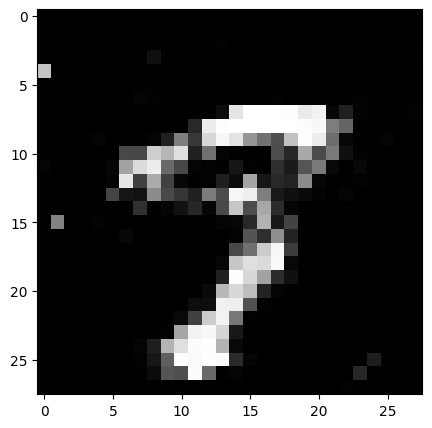

Epoch [97/200], Step [200/600], D Loss: 0.9631, G Loss: 1.8181, D(x): 0.73, D(G(z)): 0.33
Epoch [97/200], Step [400/600], D Loss: 0.7397, G Loss: 1.9780, D(x): 0.69, D(G(z)): 0.16
Epoch [97/200], Step [600/600], D Loss: 0.7104, G Loss: 2.1204, D(x): 0.81, D(G(z)): 0.29


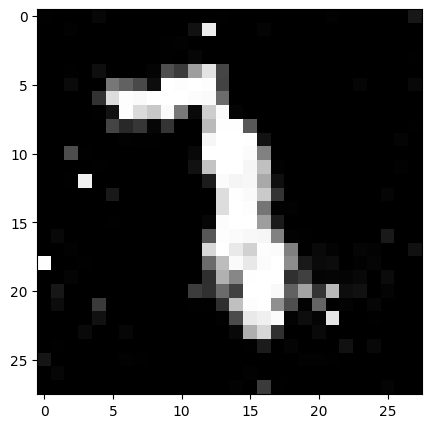

Epoch [98/200], Step [200/600], D Loss: 0.6497, G Loss: 1.9135, D(x): 0.71, D(G(z)): 0.14
Epoch [98/200], Step [400/600], D Loss: 0.8528, G Loss: 1.9287, D(x): 0.70, D(G(z)): 0.26
Epoch [98/200], Step [600/600], D Loss: 0.7709, G Loss: 2.3909, D(x): 0.72, D(G(z)): 0.21


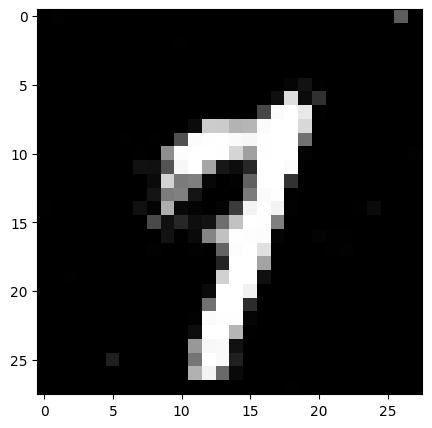

Epoch [99/200], Step [200/600], D Loss: 0.6464, G Loss: 2.5842, D(x): 0.76, D(G(z)): 0.19
Epoch [99/200], Step [400/600], D Loss: 0.7426, G Loss: 1.8925, D(x): 0.80, D(G(z)): 0.31
Epoch [99/200], Step [600/600], D Loss: 0.8897, G Loss: 2.0303, D(x): 0.74, D(G(z)): 0.30


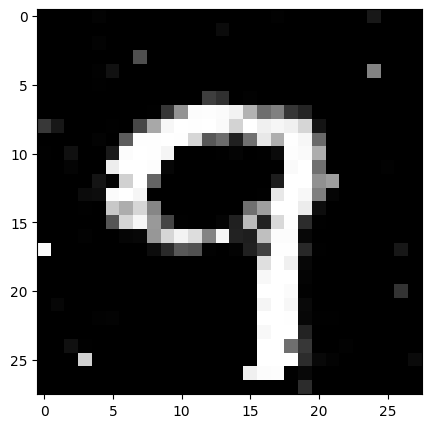

Epoch [100/200], Step [200/600], D Loss: 0.9267, G Loss: 2.0108, D(x): 0.68, D(G(z)): 0.24
Epoch [100/200], Step [400/600], D Loss: 0.6709, G Loss: 2.1809, D(x): 0.80, D(G(z)): 0.26
Epoch [100/200], Step [600/600], D Loss: 0.6297, G Loss: 2.1016, D(x): 0.79, D(G(z)): 0.21


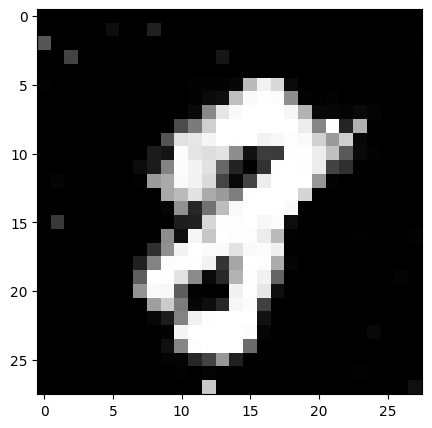

Epoch [101/200], Step [200/600], D Loss: 0.7739, G Loss: 2.1074, D(x): 0.76, D(G(z)): 0.27
Epoch [101/200], Step [400/600], D Loss: 0.9558, G Loss: 1.4778, D(x): 0.79, D(G(z)): 0.41
Epoch [101/200], Step [600/600], D Loss: 0.7760, G Loss: 2.1090, D(x): 0.74, D(G(z)): 0.25


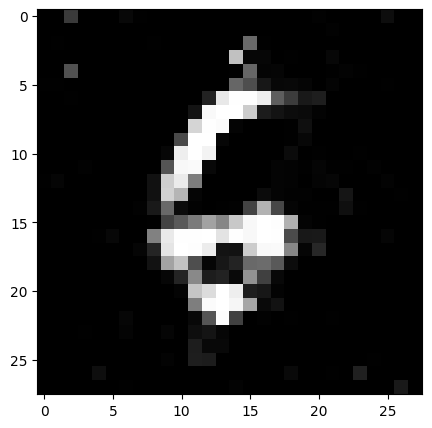

Epoch [102/200], Step [200/600], D Loss: 0.8253, G Loss: 2.1086, D(x): 0.68, D(G(z)): 0.20
Epoch [102/200], Step [400/600], D Loss: 0.8144, G Loss: 1.9255, D(x): 0.70, D(G(z)): 0.21
Epoch [102/200], Step [600/600], D Loss: 0.7822, G Loss: 2.2841, D(x): 0.73, D(G(z)): 0.24


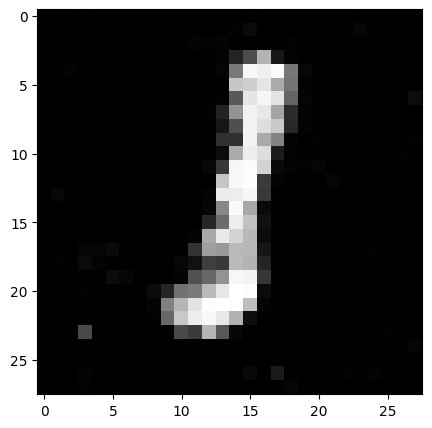

Epoch [103/200], Step [200/600], D Loss: 0.5903, G Loss: 2.2073, D(x): 0.80, D(G(z)): 0.21
Epoch [103/200], Step [400/600], D Loss: 1.0070, G Loss: 1.8708, D(x): 0.74, D(G(z)): 0.33
Epoch [103/200], Step [600/600], D Loss: 0.7409, G Loss: 1.8667, D(x): 0.83, D(G(z)): 0.32


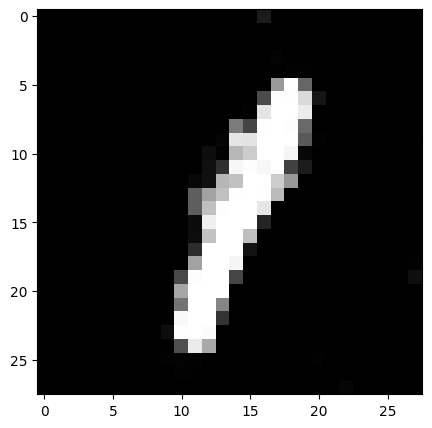

Epoch [104/200], Step [200/600], D Loss: 0.8605, G Loss: 2.0023, D(x): 0.67, D(G(z)): 0.22
Epoch [104/200], Step [400/600], D Loss: 1.0661, G Loss: 2.3412, D(x): 0.56, D(G(z)): 0.13
Epoch [104/200], Step [600/600], D Loss: 0.7649, G Loss: 1.9556, D(x): 0.73, D(G(z)): 0.22


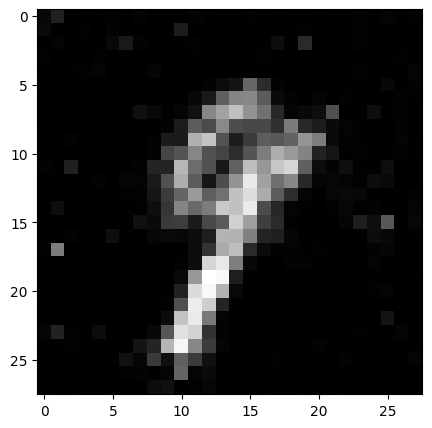

Epoch [105/200], Step [200/600], D Loss: 0.7078, G Loss: 1.4961, D(x): 0.74, D(G(z)): 0.26
Epoch [105/200], Step [400/600], D Loss: 0.8395, G Loss: 2.1287, D(x): 0.74, D(G(z)): 0.25
Epoch [105/200], Step [600/600], D Loss: 0.8405, G Loss: 1.4561, D(x): 0.70, D(G(z)): 0.25


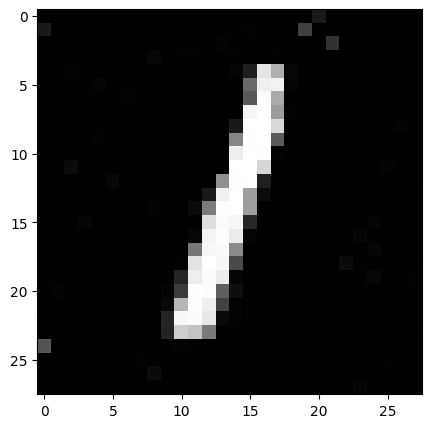

Epoch [106/200], Step [200/600], D Loss: 0.7854, G Loss: 1.6035, D(x): 0.76, D(G(z)): 0.27
Epoch [106/200], Step [400/600], D Loss: 0.6818, G Loss: 2.0901, D(x): 0.71, D(G(z)): 0.19
Epoch [106/200], Step [600/600], D Loss: 0.8821, G Loss: 2.4854, D(x): 0.76, D(G(z)): 0.32


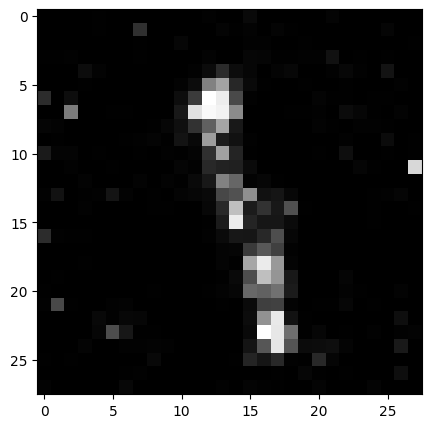

Epoch [107/200], Step [200/600], D Loss: 0.9004, G Loss: 1.5161, D(x): 0.82, D(G(z)): 0.38
Epoch [107/200], Step [400/600], D Loss: 0.7667, G Loss: 1.3750, D(x): 0.79, D(G(z)): 0.32
Epoch [107/200], Step [600/600], D Loss: 0.8741, G Loss: 1.6715, D(x): 0.75, D(G(z)): 0.33


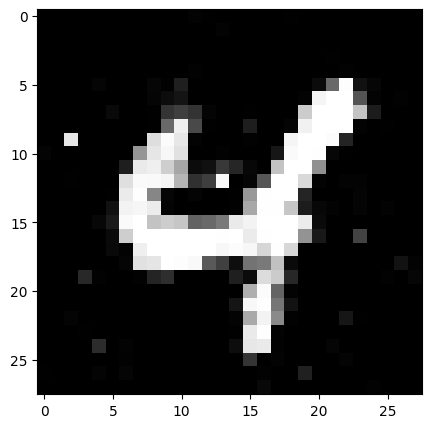

Epoch [108/200], Step [200/600], D Loss: 0.8196, G Loss: 1.8326, D(x): 0.83, D(G(z)): 0.34
Epoch [108/200], Step [400/600], D Loss: 0.8691, G Loss: 1.6182, D(x): 0.70, D(G(z)): 0.30
Epoch [108/200], Step [600/600], D Loss: 0.7546, G Loss: 2.2118, D(x): 0.72, D(G(z)): 0.21


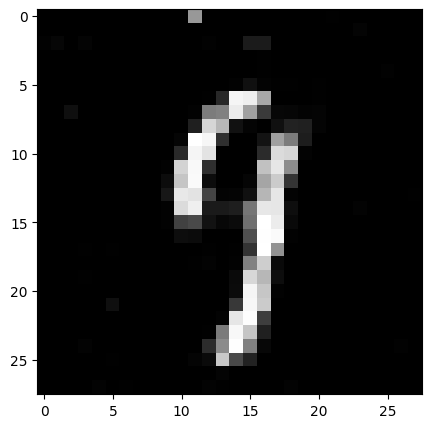

Epoch [109/200], Step [200/600], D Loss: 0.8496, G Loss: 2.1276, D(x): 0.72, D(G(z)): 0.25
Epoch [109/200], Step [400/600], D Loss: 0.7315, G Loss: 1.8295, D(x): 0.78, D(G(z)): 0.26
Epoch [109/200], Step [600/600], D Loss: 0.7977, G Loss: 1.6602, D(x): 0.76, D(G(z)): 0.29


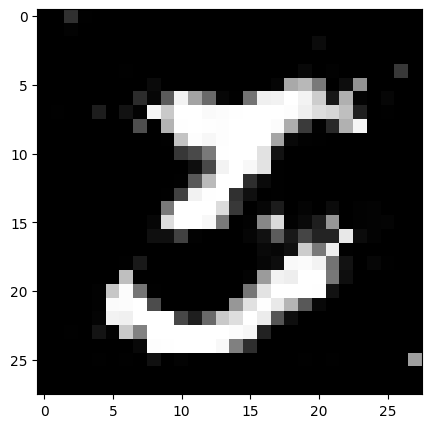

Epoch [110/200], Step [200/600], D Loss: 0.8207, G Loss: 1.4851, D(x): 0.76, D(G(z)): 0.32
Epoch [110/200], Step [400/600], D Loss: 0.9679, G Loss: 1.7621, D(x): 0.66, D(G(z)): 0.24
Epoch [110/200], Step [600/600], D Loss: 0.8262, G Loss: 1.4596, D(x): 0.71, D(G(z)): 0.23


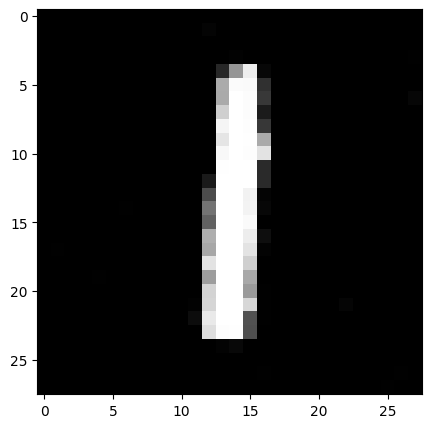

Epoch [111/200], Step [200/600], D Loss: 0.7824, G Loss: 1.7204, D(x): 0.83, D(G(z)): 0.35
Epoch [111/200], Step [400/600], D Loss: 0.7061, G Loss: 2.0493, D(x): 0.77, D(G(z)): 0.26
Epoch [111/200], Step [600/600], D Loss: 0.7750, G Loss: 1.4087, D(x): 0.77, D(G(z)): 0.29


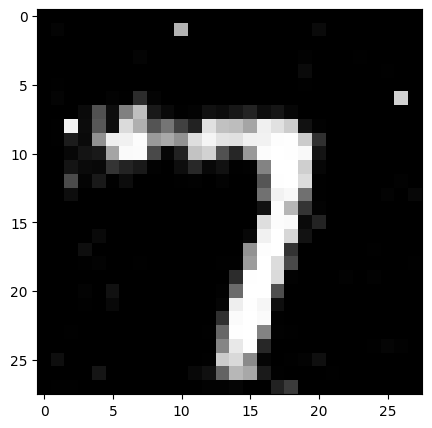

Epoch [112/200], Step [200/600], D Loss: 0.6854, G Loss: 2.0242, D(x): 0.75, D(G(z)): 0.24
Epoch [112/200], Step [400/600], D Loss: 0.6336, G Loss: 1.8382, D(x): 0.80, D(G(z)): 0.25
Epoch [112/200], Step [600/600], D Loss: 0.9024, G Loss: 1.5065, D(x): 0.80, D(G(z)): 0.38


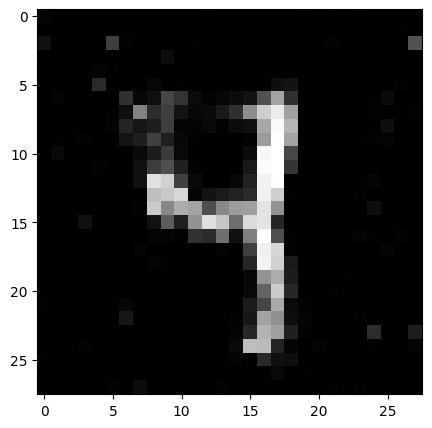

Epoch [113/200], Step [200/600], D Loss: 0.7019, G Loss: 1.5904, D(x): 0.78, D(G(z)): 0.27
Epoch [113/200], Step [400/600], D Loss: 0.8907, G Loss: 2.3133, D(x): 0.71, D(G(z)): 0.27
Epoch [113/200], Step [600/600], D Loss: 0.9429, G Loss: 1.4763, D(x): 0.71, D(G(z)): 0.31


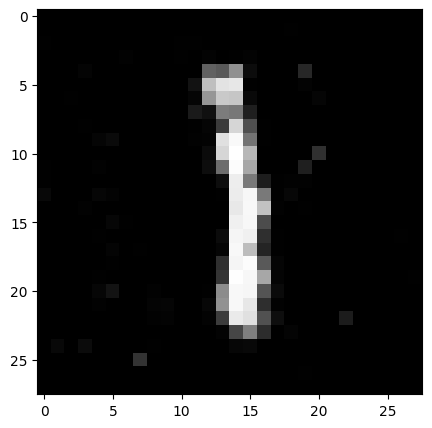

Epoch [114/200], Step [200/600], D Loss: 0.8612, G Loss: 1.6383, D(x): 0.78, D(G(z)): 0.31
Epoch [114/200], Step [400/600], D Loss: 0.6881, G Loss: 1.6931, D(x): 0.75, D(G(z)): 0.24
Epoch [114/200], Step [600/600], D Loss: 0.8429, G Loss: 1.5092, D(x): 0.70, D(G(z)): 0.23


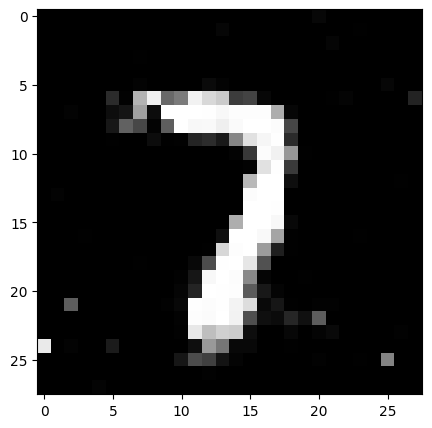

Epoch [115/200], Step [200/600], D Loss: 0.7558, G Loss: 1.4451, D(x): 0.82, D(G(z)): 0.32
Epoch [115/200], Step [400/600], D Loss: 0.7534, G Loss: 1.6790, D(x): 0.75, D(G(z)): 0.25
Epoch [115/200], Step [600/600], D Loss: 0.6989, G Loss: 2.1435, D(x): 0.75, D(G(z)): 0.21


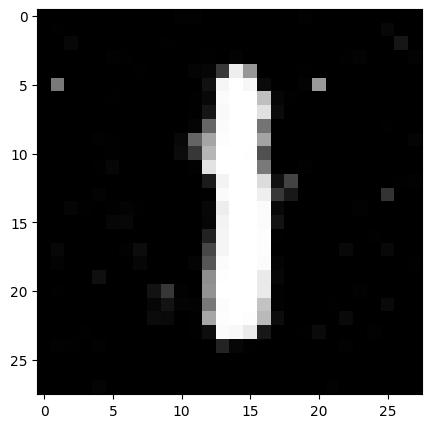

Epoch [116/200], Step [200/600], D Loss: 0.8840, G Loss: 1.7781, D(x): 0.72, D(G(z)): 0.30
Epoch [116/200], Step [400/600], D Loss: 0.8910, G Loss: 1.3813, D(x): 0.68, D(G(z)): 0.27
Epoch [116/200], Step [600/600], D Loss: 0.7495, G Loss: 1.8413, D(x): 0.74, D(G(z)): 0.24


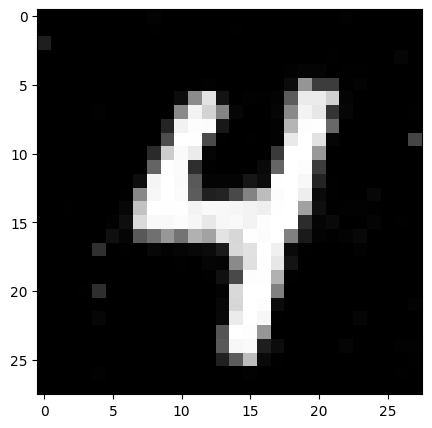

Epoch [117/200], Step [200/600], D Loss: 0.6933, G Loss: 2.1507, D(x): 0.76, D(G(z)): 0.23
Epoch [117/200], Step [400/600], D Loss: 0.8935, G Loss: 1.8894, D(x): 0.68, D(G(z)): 0.22
Epoch [117/200], Step [600/600], D Loss: 0.8898, G Loss: 1.9875, D(x): 0.69, D(G(z)): 0.26


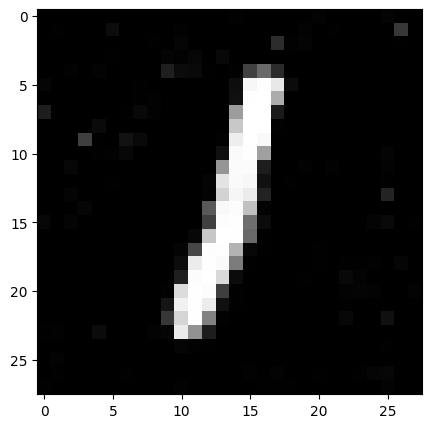

Epoch [118/200], Step [200/600], D Loss: 0.7766, G Loss: 1.4060, D(x): 0.73, D(G(z)): 0.26
Epoch [118/200], Step [400/600], D Loss: 0.7910, G Loss: 1.8394, D(x): 0.72, D(G(z)): 0.27
Epoch [118/200], Step [600/600], D Loss: 0.9621, G Loss: 1.7755, D(x): 0.70, D(G(z)): 0.30


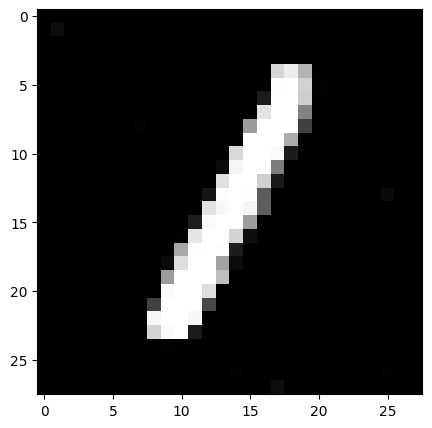

Epoch [119/200], Step [200/600], D Loss: 0.8147, G Loss: 1.4321, D(x): 0.77, D(G(z)): 0.33
Epoch [119/200], Step [400/600], D Loss: 0.8446, G Loss: 1.5099, D(x): 0.70, D(G(z)): 0.28
Epoch [119/200], Step [600/600], D Loss: 0.9071, G Loss: 1.6096, D(x): 0.77, D(G(z)): 0.37


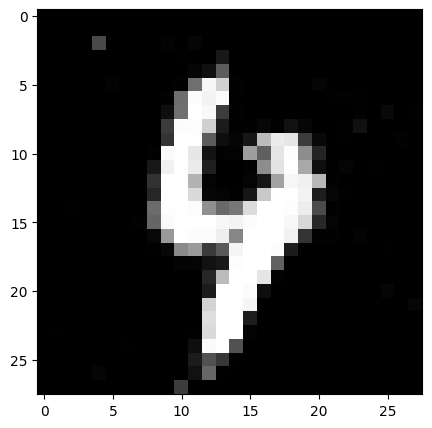

Epoch [120/200], Step [200/600], D Loss: 0.8799, G Loss: 1.6715, D(x): 0.75, D(G(z)): 0.33
Epoch [120/200], Step [400/600], D Loss: 0.7975, G Loss: 2.4900, D(x): 0.72, D(G(z)): 0.24
Epoch [120/200], Step [600/600], D Loss: 0.6389, G Loss: 1.8946, D(x): 0.74, D(G(z)): 0.18


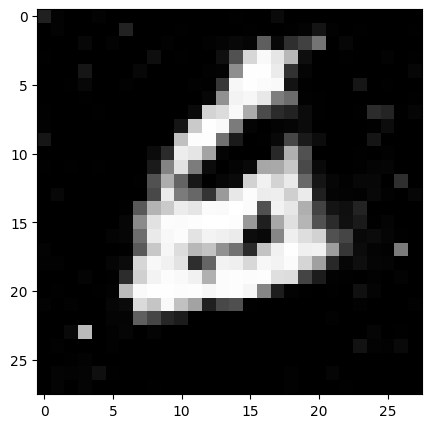

Epoch [121/200], Step [200/600], D Loss: 0.8365, G Loss: 1.5721, D(x): 0.73, D(G(z)): 0.31
Epoch [121/200], Step [400/600], D Loss: 0.8089, G Loss: 1.7822, D(x): 0.70, D(G(z)): 0.23
Epoch [121/200], Step [600/600], D Loss: 0.9425, G Loss: 1.7480, D(x): 0.65, D(G(z)): 0.26


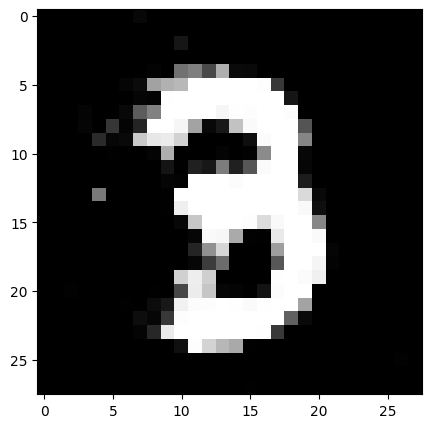

Epoch [122/200], Step [200/600], D Loss: 0.9964, G Loss: 1.7324, D(x): 0.67, D(G(z)): 0.25
Epoch [122/200], Step [400/600], D Loss: 1.0384, G Loss: 1.7692, D(x): 0.60, D(G(z)): 0.25
Epoch [122/200], Step [600/600], D Loss: 0.7400, G Loss: 1.7382, D(x): 0.76, D(G(z)): 0.28


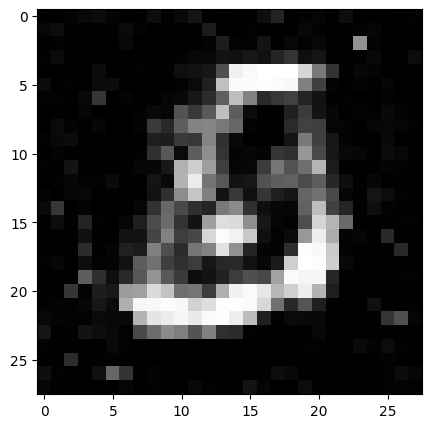

Epoch [123/200], Step [200/600], D Loss: 0.6697, G Loss: 2.1476, D(x): 0.79, D(G(z)): 0.26
Epoch [123/200], Step [400/600], D Loss: 0.9615, G Loss: 1.8164, D(x): 0.73, D(G(z)): 0.32
Epoch [123/200], Step [600/600], D Loss: 0.9632, G Loss: 1.5929, D(x): 0.75, D(G(z)): 0.33


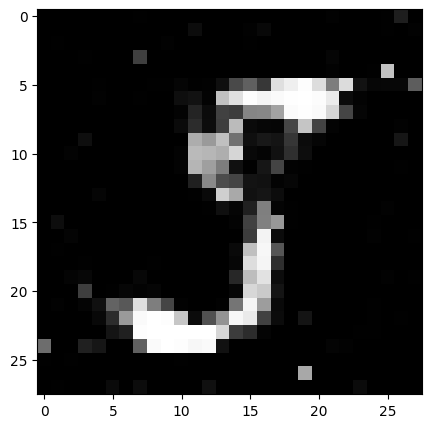

Epoch [124/200], Step [200/600], D Loss: 1.1683, G Loss: 1.4977, D(x): 0.70, D(G(z)): 0.36
Epoch [124/200], Step [400/600], D Loss: 0.9694, G Loss: 2.0987, D(x): 0.67, D(G(z)): 0.28
Epoch [124/200], Step [600/600], D Loss: 0.7110, G Loss: 2.1702, D(x): 0.77, D(G(z)): 0.26


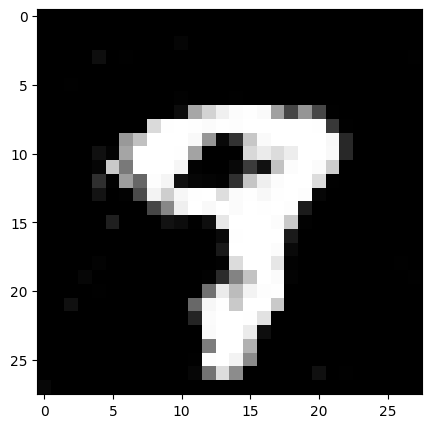

Epoch [125/200], Step [200/600], D Loss: 1.0564, G Loss: 1.8827, D(x): 0.60, D(G(z)): 0.24
Epoch [125/200], Step [400/600], D Loss: 0.9440, G Loss: 1.4914, D(x): 0.75, D(G(z)): 0.35
Epoch [125/200], Step [600/600], D Loss: 0.8747, G Loss: 2.4205, D(x): 0.64, D(G(z)): 0.15


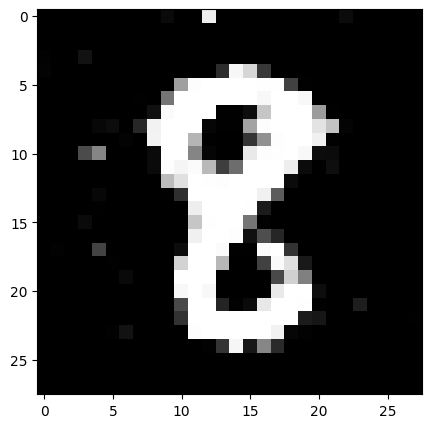

Epoch [126/200], Step [200/600], D Loss: 1.0979, G Loss: 1.5256, D(x): 0.68, D(G(z)): 0.33
Epoch [126/200], Step [400/600], D Loss: 0.9318, G Loss: 1.1189, D(x): 0.72, D(G(z)): 0.31
Epoch [126/200], Step [600/600], D Loss: 0.9683, G Loss: 1.9527, D(x): 0.65, D(G(z)): 0.28


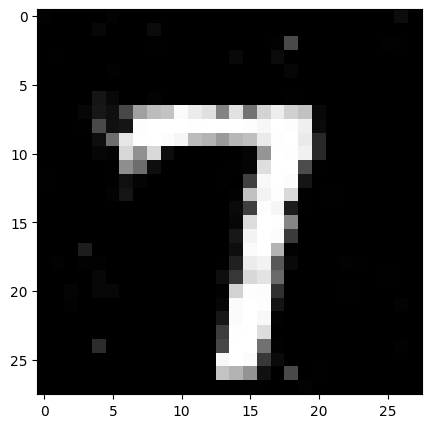

Epoch [127/200], Step [200/600], D Loss: 0.8868, G Loss: 1.5449, D(x): 0.70, D(G(z)): 0.28
Epoch [127/200], Step [400/600], D Loss: 0.8562, G Loss: 1.5924, D(x): 0.75, D(G(z)): 0.29
Epoch [127/200], Step [600/600], D Loss: 0.9172, G Loss: 1.5835, D(x): 0.69, D(G(z)): 0.32


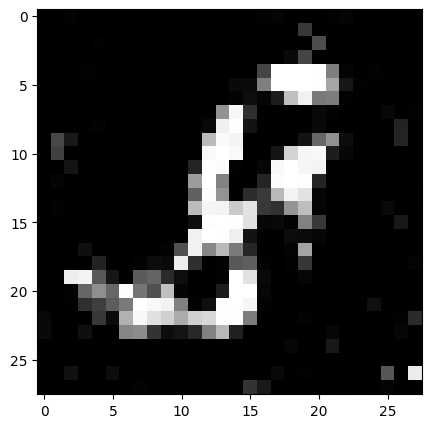

Epoch [128/200], Step [200/600], D Loss: 0.8202, G Loss: 1.9903, D(x): 0.66, D(G(z)): 0.22
Epoch [128/200], Step [400/600], D Loss: 0.6799, G Loss: 1.7648, D(x): 0.75, D(G(z)): 0.23
Epoch [128/200], Step [600/600], D Loss: 1.0532, G Loss: 1.7531, D(x): 0.58, D(G(z)): 0.22


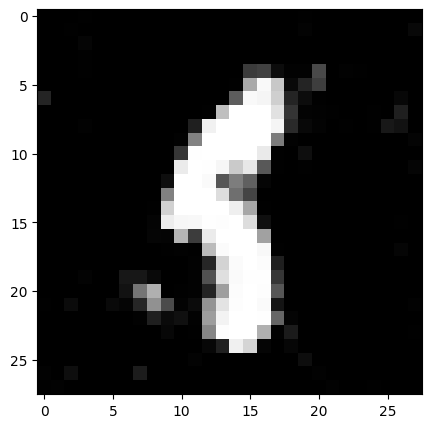

Epoch [129/200], Step [200/600], D Loss: 1.0382, G Loss: 1.7390, D(x): 0.60, D(G(z)): 0.23
Epoch [129/200], Step [400/600], D Loss: 0.9282, G Loss: 1.4597, D(x): 0.71, D(G(z)): 0.32
Epoch [129/200], Step [600/600], D Loss: 0.9073, G Loss: 1.6649, D(x): 0.76, D(G(z)): 0.35


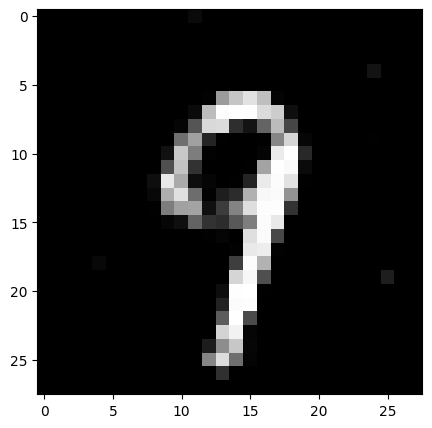

Epoch [130/200], Step [200/600], D Loss: 1.0283, G Loss: 1.3588, D(x): 0.71, D(G(z)): 0.35
Epoch [130/200], Step [400/600], D Loss: 0.8194, G Loss: 2.5751, D(x): 0.79, D(G(z)): 0.34
Epoch [130/200], Step [600/600], D Loss: 1.1116, G Loss: 1.3876, D(x): 0.68, D(G(z)): 0.39


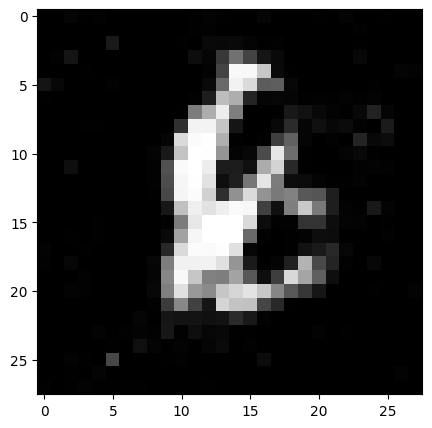

Epoch [131/200], Step [200/600], D Loss: 0.9770, G Loss: 1.7243, D(x): 0.74, D(G(z)): 0.36
Epoch [131/200], Step [400/600], D Loss: 0.8519, G Loss: 1.5662, D(x): 0.76, D(G(z)): 0.35
Epoch [131/200], Step [600/600], D Loss: 0.7907, G Loss: 2.0088, D(x): 0.79, D(G(z)): 0.33


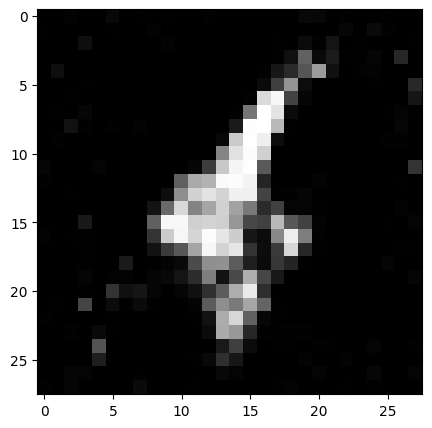

Epoch [132/200], Step [200/600], D Loss: 0.8889, G Loss: 1.6461, D(x): 0.64, D(G(z)): 0.22
Epoch [132/200], Step [400/600], D Loss: 0.8957, G Loss: 1.3030, D(x): 0.79, D(G(z)): 0.38
Epoch [132/200], Step [600/600], D Loss: 0.7957, G Loss: 1.9232, D(x): 0.73, D(G(z)): 0.27


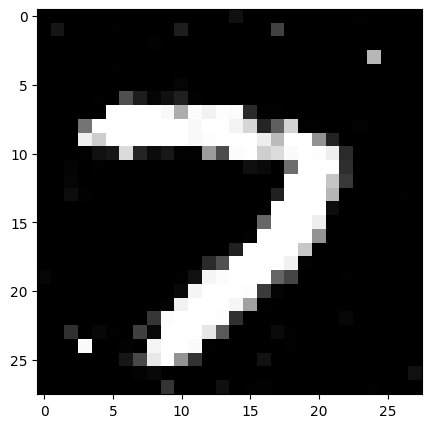

Epoch [133/200], Step [200/600], D Loss: 0.7963, G Loss: 2.0394, D(x): 0.69, D(G(z)): 0.21
Epoch [133/200], Step [400/600], D Loss: 0.8479, G Loss: 1.9034, D(x): 0.79, D(G(z)): 0.37
Epoch [133/200], Step [600/600], D Loss: 0.8104, G Loss: 1.5974, D(x): 0.74, D(G(z)): 0.29


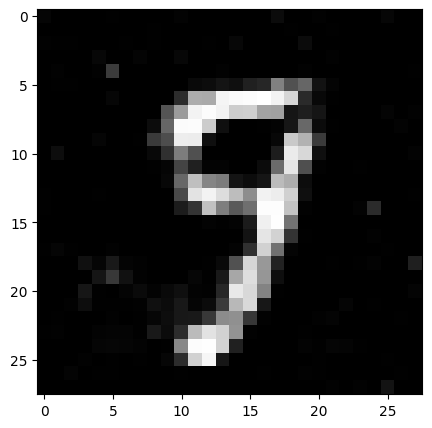

Epoch [134/200], Step [200/600], D Loss: 0.8782, G Loss: 1.5578, D(x): 0.68, D(G(z)): 0.22
Epoch [134/200], Step [400/600], D Loss: 0.9100, G Loss: 1.8039, D(x): 0.72, D(G(z)): 0.30
Epoch [134/200], Step [600/600], D Loss: 0.9925, G Loss: 1.3730, D(x): 0.62, D(G(z)): 0.25


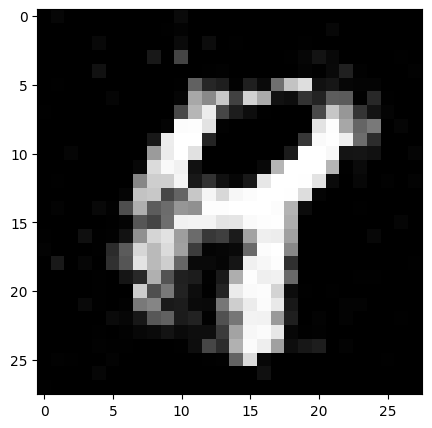

Epoch [135/200], Step [200/600], D Loss: 0.9592, G Loss: 1.5700, D(x): 0.59, D(G(z)): 0.21
Epoch [135/200], Step [400/600], D Loss: 0.9770, G Loss: 1.5730, D(x): 0.64, D(G(z)): 0.25
Epoch [135/200], Step [600/600], D Loss: 1.0215, G Loss: 1.9621, D(x): 0.80, D(G(z)): 0.41


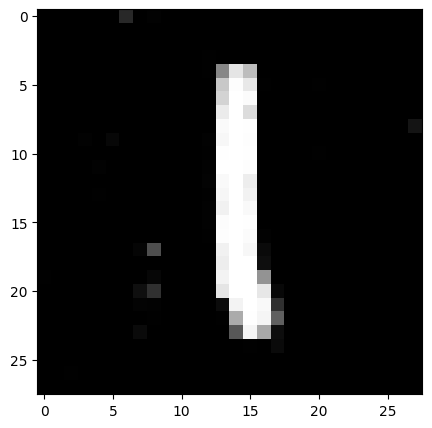

Epoch [136/200], Step [200/600], D Loss: 0.7841, G Loss: 1.6347, D(x): 0.73, D(G(z)): 0.25
Epoch [136/200], Step [400/600], D Loss: 0.8647, G Loss: 2.1417, D(x): 0.73, D(G(z)): 0.31
Epoch [136/200], Step [600/600], D Loss: 0.8766, G Loss: 1.3809, D(x): 0.74, D(G(z)): 0.32


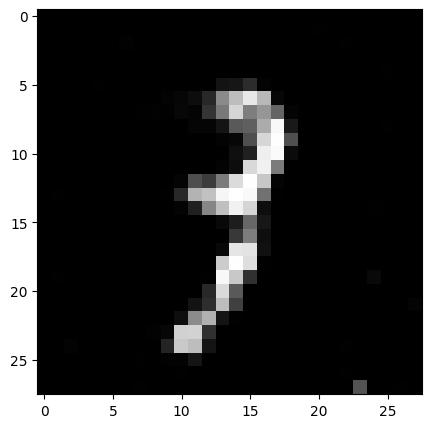

Epoch [137/200], Step [200/600], D Loss: 0.7776, G Loss: 1.9792, D(x): 0.68, D(G(z)): 0.18
Epoch [137/200], Step [400/600], D Loss: 0.9444, G Loss: 1.4912, D(x): 0.68, D(G(z)): 0.29
Epoch [137/200], Step [600/600], D Loss: 0.9070, G Loss: 1.5436, D(x): 0.66, D(G(z)): 0.24


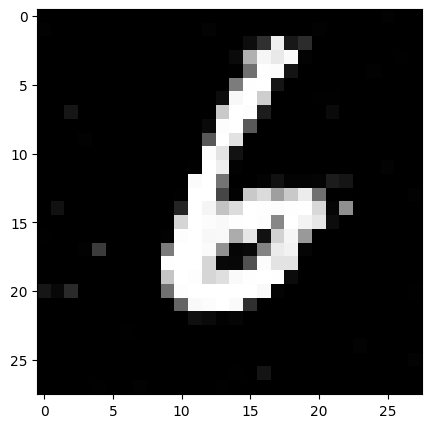

Epoch [138/200], Step [200/600], D Loss: 0.9673, G Loss: 1.3729, D(x): 0.71, D(G(z)): 0.35
Epoch [138/200], Step [400/600], D Loss: 0.8629, G Loss: 1.6246, D(x): 0.69, D(G(z)): 0.25
Epoch [138/200], Step [600/600], D Loss: 1.0750, G Loss: 1.5853, D(x): 0.57, D(G(z)): 0.24


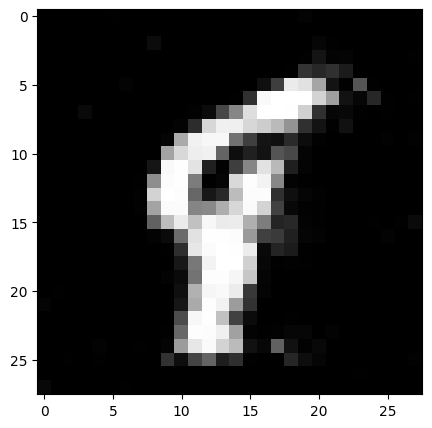

Epoch [139/200], Step [200/600], D Loss: 0.9105, G Loss: 1.9990, D(x): 0.72, D(G(z)): 0.29
Epoch [139/200], Step [400/600], D Loss: 1.2638, G Loss: 1.2365, D(x): 0.55, D(G(z)): 0.29
Epoch [139/200], Step [600/600], D Loss: 0.8713, G Loss: 1.4284, D(x): 0.72, D(G(z)): 0.30


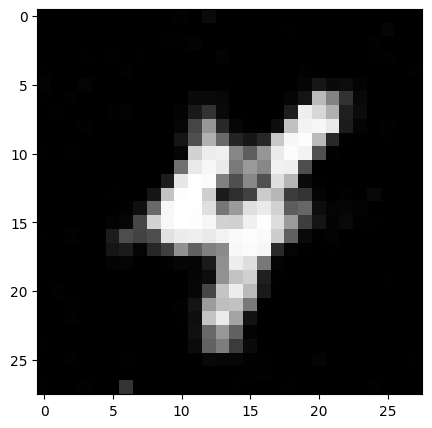

Epoch [140/200], Step [200/600], D Loss: 0.7251, G Loss: 2.2910, D(x): 0.75, D(G(z)): 0.25
Epoch [140/200], Step [400/600], D Loss: 0.7796, G Loss: 1.7005, D(x): 0.74, D(G(z)): 0.25
Epoch [140/200], Step [600/600], D Loss: 0.8473, G Loss: 1.6588, D(x): 0.73, D(G(z)): 0.32


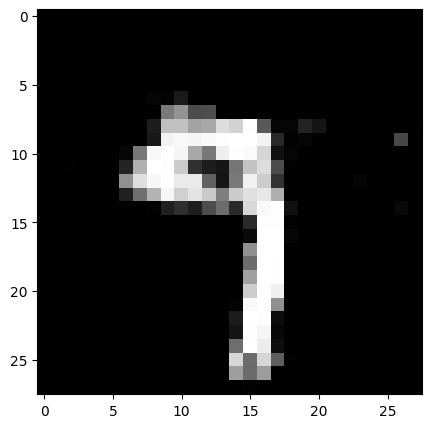

Epoch [141/200], Step [200/600], D Loss: 0.9016, G Loss: 1.5169, D(x): 0.68, D(G(z)): 0.29
Epoch [141/200], Step [400/600], D Loss: 0.8631, G Loss: 1.6916, D(x): 0.71, D(G(z)): 0.28
Epoch [141/200], Step [600/600], D Loss: 0.9531, G Loss: 1.9415, D(x): 0.63, D(G(z)): 0.24


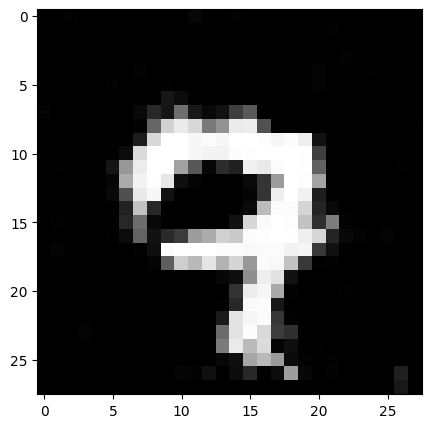

Epoch [142/200], Step [200/600], D Loss: 0.7896, G Loss: 1.4918, D(x): 0.69, D(G(z)): 0.25
Epoch [142/200], Step [400/600], D Loss: 0.7764, G Loss: 1.4745, D(x): 0.77, D(G(z)): 0.29
Epoch [142/200], Step [600/600], D Loss: 0.7476, G Loss: 1.7363, D(x): 0.76, D(G(z)): 0.28


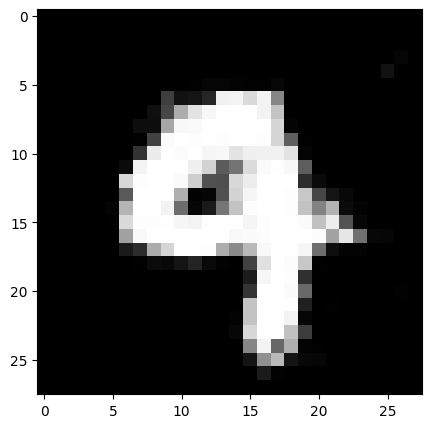

Epoch [143/200], Step [200/600], D Loss: 1.0496, G Loss: 1.3185, D(x): 0.70, D(G(z)): 0.38
Epoch [143/200], Step [400/600], D Loss: 0.9574, G Loss: 2.0018, D(x): 0.65, D(G(z)): 0.26
Epoch [143/200], Step [600/600], D Loss: 1.1637, G Loss: 1.2380, D(x): 0.62, D(G(z)): 0.34


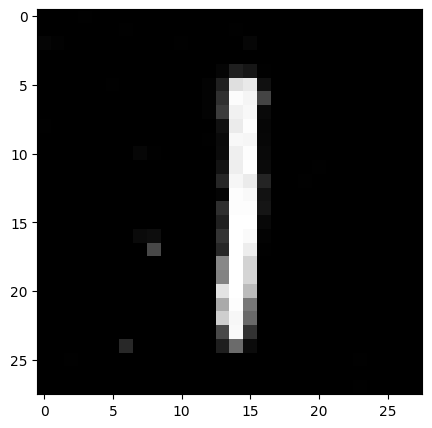

Epoch [144/200], Step [200/600], D Loss: 1.1977, G Loss: 1.3991, D(x): 0.63, D(G(z)): 0.33
Epoch [144/200], Step [400/600], D Loss: 0.8315, G Loss: 1.4967, D(x): 0.75, D(G(z)): 0.29
Epoch [144/200], Step [600/600], D Loss: 1.0957, G Loss: 1.3595, D(x): 0.71, D(G(z)): 0.41


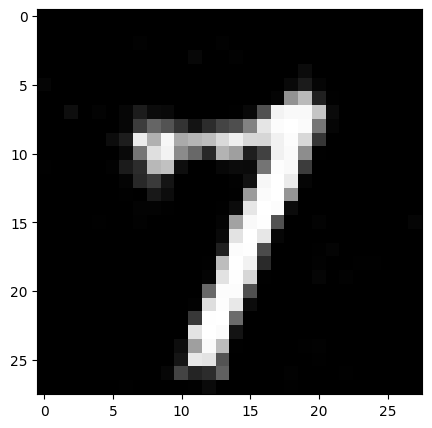

Epoch [145/200], Step [200/600], D Loss: 0.9975, G Loss: 1.4922, D(x): 0.61, D(G(z)): 0.25
Epoch [145/200], Step [400/600], D Loss: 0.9246, G Loss: 1.4852, D(x): 0.63, D(G(z)): 0.19
Epoch [145/200], Step [600/600], D Loss: 0.7972, G Loss: 1.4490, D(x): 0.78, D(G(z)): 0.33


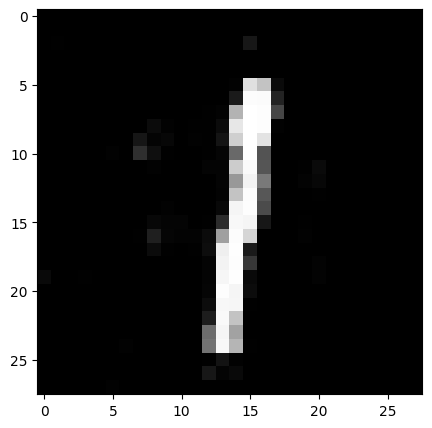

Epoch [146/200], Step [200/600], D Loss: 0.8453, G Loss: 1.5839, D(x): 0.67, D(G(z)): 0.21
Epoch [146/200], Step [400/600], D Loss: 0.7322, G Loss: 1.1451, D(x): 0.74, D(G(z)): 0.26
Epoch [146/200], Step [600/600], D Loss: 0.8502, G Loss: 1.9381, D(x): 0.69, D(G(z)): 0.26


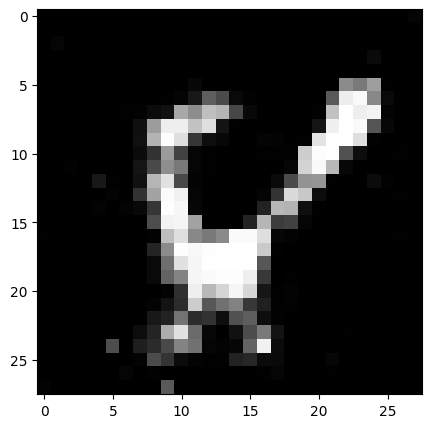

Epoch [147/200], Step [200/600], D Loss: 0.9175, G Loss: 1.6373, D(x): 0.68, D(G(z)): 0.26
Epoch [147/200], Step [400/600], D Loss: 0.7957, G Loss: 1.4915, D(x): 0.75, D(G(z)): 0.32
Epoch [147/200], Step [600/600], D Loss: 0.7804, G Loss: 1.8338, D(x): 0.70, D(G(z)): 0.24


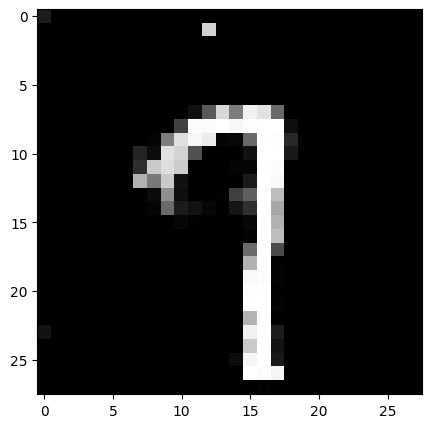

Epoch [148/200], Step [200/600], D Loss: 0.9895, G Loss: 1.5628, D(x): 0.71, D(G(z)): 0.34
Epoch [148/200], Step [400/600], D Loss: 0.9430, G Loss: 1.7809, D(x): 0.70, D(G(z)): 0.32
Epoch [148/200], Step [600/600], D Loss: 1.0051, G Loss: 1.9297, D(x): 0.67, D(G(z)): 0.32


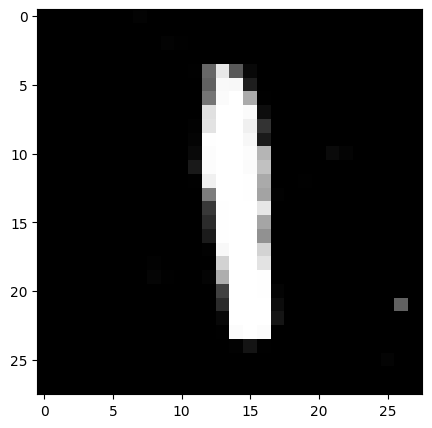

Epoch [149/200], Step [200/600], D Loss: 0.8360, G Loss: 2.2189, D(x): 0.70, D(G(z)): 0.26
Epoch [149/200], Step [400/600], D Loss: 0.8317, G Loss: 1.8355, D(x): 0.73, D(G(z)): 0.30
Epoch [149/200], Step [600/600], D Loss: 0.9946, G Loss: 1.9890, D(x): 0.63, D(G(z)): 0.25


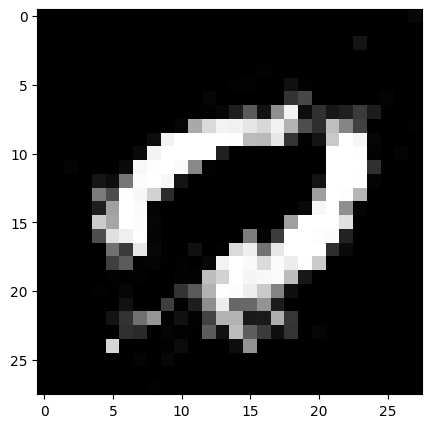

Epoch [150/200], Step [200/600], D Loss: 0.8744, G Loss: 1.2650, D(x): 0.82, D(G(z)): 0.36
Epoch [150/200], Step [400/600], D Loss: 1.0173, G Loss: 1.7881, D(x): 0.75, D(G(z)): 0.35
Epoch [150/200], Step [600/600], D Loss: 0.8337, G Loss: 1.3231, D(x): 0.77, D(G(z)): 0.35


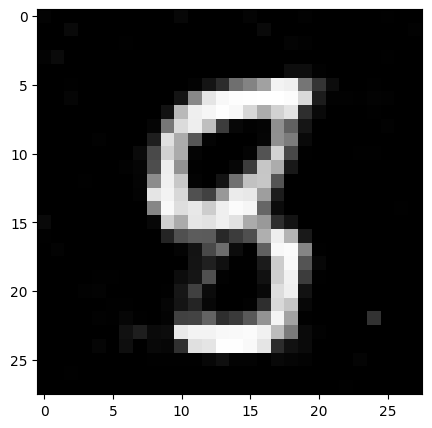

Epoch [151/200], Step [200/600], D Loss: 0.8207, G Loss: 1.0671, D(x): 0.77, D(G(z)): 0.33
Epoch [151/200], Step [400/600], D Loss: 0.8418, G Loss: 1.7550, D(x): 0.68, D(G(z)): 0.25
Epoch [151/200], Step [600/600], D Loss: 1.0370, G Loss: 1.5917, D(x): 0.70, D(G(z)): 0.36


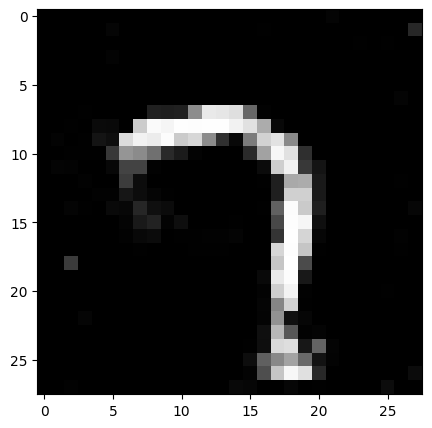

Epoch [152/200], Step [200/600], D Loss: 0.7273, G Loss: 1.6691, D(x): 0.75, D(G(z)): 0.26
Epoch [152/200], Step [400/600], D Loss: 0.9686, G Loss: 1.2420, D(x): 0.66, D(G(z)): 0.30
Epoch [152/200], Step [600/600], D Loss: 0.6911, G Loss: 1.6709, D(x): 0.80, D(G(z)): 0.29


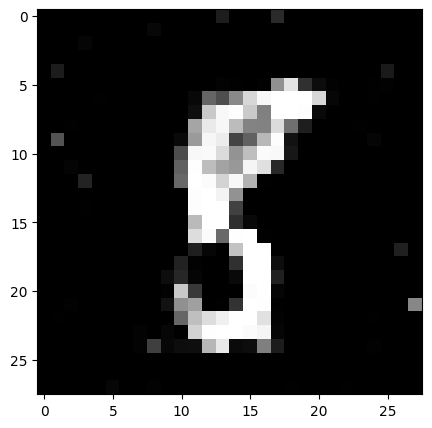

Epoch [153/200], Step [200/600], D Loss: 0.9430, G Loss: 1.4766, D(x): 0.69, D(G(z)): 0.32
Epoch [153/200], Step [400/600], D Loss: 0.7848, G Loss: 1.7429, D(x): 0.69, D(G(z)): 0.23
Epoch [153/200], Step [600/600], D Loss: 0.9167, G Loss: 1.3562, D(x): 0.71, D(G(z)): 0.30


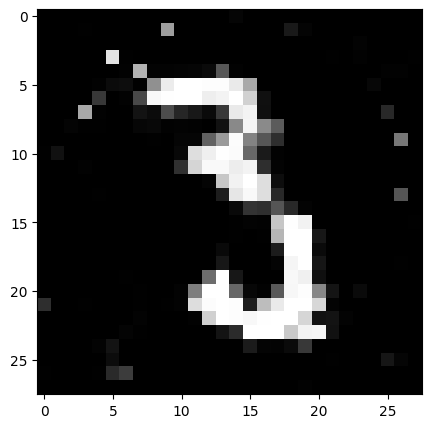

Epoch [154/200], Step [200/600], D Loss: 0.9265, G Loss: 1.3973, D(x): 0.68, D(G(z)): 0.29
Epoch [154/200], Step [400/600], D Loss: 0.9252, G Loss: 1.3408, D(x): 0.63, D(G(z)): 0.23
Epoch [154/200], Step [600/600], D Loss: 0.9732, G Loss: 1.3668, D(x): 0.71, D(G(z)): 0.36


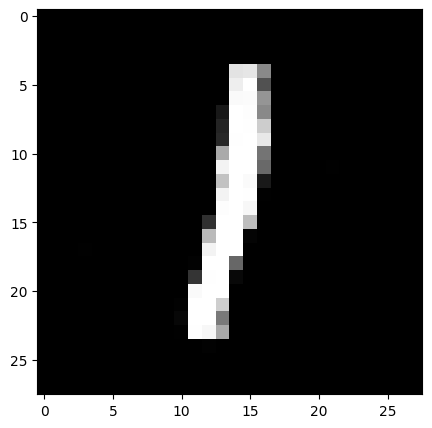

Epoch [155/200], Step [200/600], D Loss: 0.9399, G Loss: 1.8245, D(x): 0.68, D(G(z)): 0.29
Epoch [155/200], Step [400/600], D Loss: 1.0602, G Loss: 1.5276, D(x): 0.63, D(G(z)): 0.29
Epoch [155/200], Step [600/600], D Loss: 0.9736, G Loss: 1.5745, D(x): 0.71, D(G(z)): 0.36


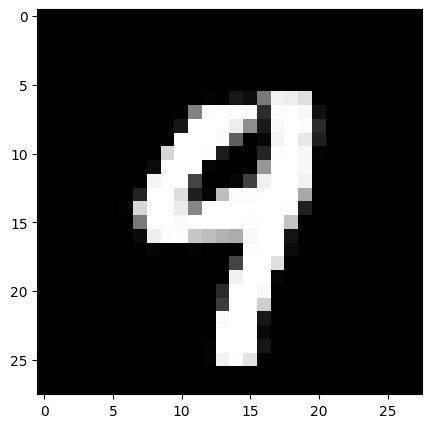

Epoch [156/200], Step [200/600], D Loss: 0.8716, G Loss: 2.0333, D(x): 0.67, D(G(z)): 0.24
Epoch [156/200], Step [400/600], D Loss: 0.9659, G Loss: 1.6684, D(x): 0.73, D(G(z)): 0.36
Epoch [156/200], Step [600/600], D Loss: 0.8863, G Loss: 1.6469, D(x): 0.70, D(G(z)): 0.29


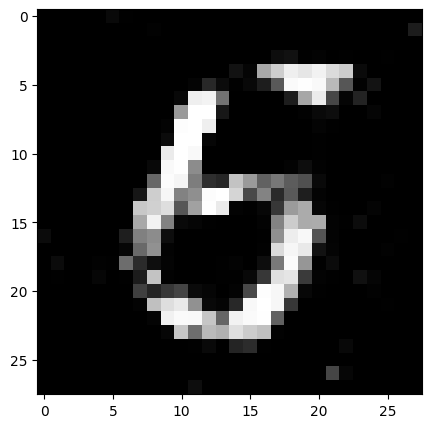

Epoch [157/200], Step [200/600], D Loss: 0.9907, G Loss: 1.9967, D(x): 0.65, D(G(z)): 0.26
Epoch [157/200], Step [400/600], D Loss: 0.8112, G Loss: 1.3661, D(x): 0.71, D(G(z)): 0.24
Epoch [157/200], Step [600/600], D Loss: 1.0374, G Loss: 1.4770, D(x): 0.66, D(G(z)): 0.30


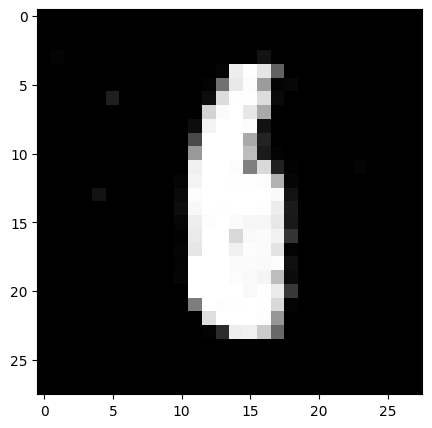

Epoch [158/200], Step [200/600], D Loss: 0.9790, G Loss: 1.6302, D(x): 0.74, D(G(z)): 0.37
Epoch [158/200], Step [400/600], D Loss: 1.1322, G Loss: 1.1536, D(x): 0.70, D(G(z)): 0.40
Epoch [158/200], Step [600/600], D Loss: 1.0817, G Loss: 1.5554, D(x): 0.71, D(G(z)): 0.36


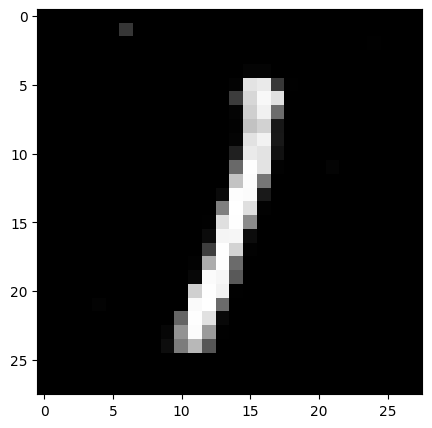

Epoch [159/200], Step [200/600], D Loss: 0.9335, G Loss: 1.4386, D(x): 0.68, D(G(z)): 0.30
Epoch [159/200], Step [400/600], D Loss: 1.0373, G Loss: 1.6190, D(x): 0.66, D(G(z)): 0.30
Epoch [159/200], Step [600/600], D Loss: 0.7991, G Loss: 1.6524, D(x): 0.73, D(G(z)): 0.27


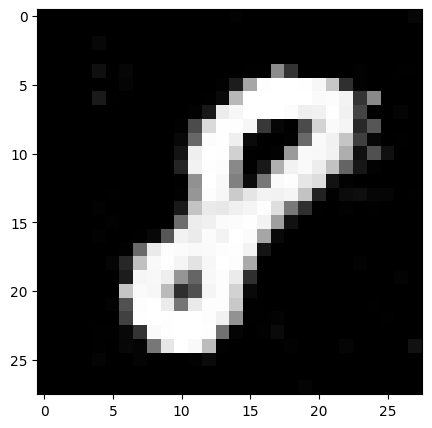

Epoch [160/200], Step [200/600], D Loss: 0.9760, G Loss: 1.6201, D(x): 0.78, D(G(z)): 0.38
Epoch [160/200], Step [400/600], D Loss: 0.7835, G Loss: 2.0017, D(x): 0.73, D(G(z)): 0.24
Epoch [160/200], Step [600/600], D Loss: 0.9003, G Loss: 1.4894, D(x): 0.74, D(G(z)): 0.34


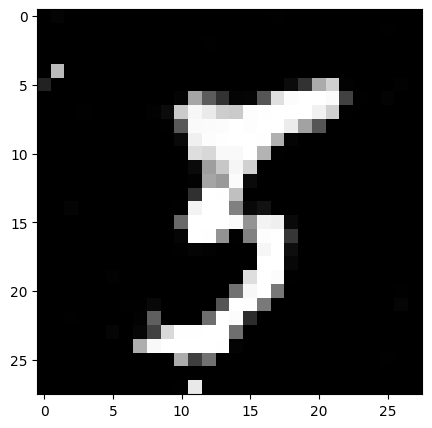

Epoch [161/200], Step [200/600], D Loss: 0.8614, G Loss: 1.9412, D(x): 0.67, D(G(z)): 0.26
Epoch [161/200], Step [400/600], D Loss: 0.8129, G Loss: 1.3641, D(x): 0.71, D(G(z)): 0.29
Epoch [161/200], Step [600/600], D Loss: 0.9591, G Loss: 1.6589, D(x): 0.62, D(G(z)): 0.27


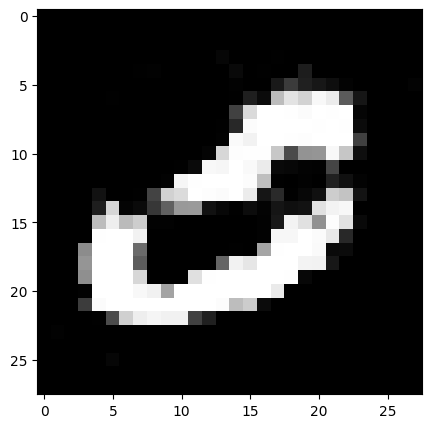

Epoch [162/200], Step [200/600], D Loss: 0.9906, G Loss: 1.5202, D(x): 0.65, D(G(z)): 0.28
Epoch [162/200], Step [400/600], D Loss: 0.9237, G Loss: 1.5579, D(x): 0.73, D(G(z)): 0.34
Epoch [162/200], Step [600/600], D Loss: 0.9867, G Loss: 1.5810, D(x): 0.73, D(G(z)): 0.36


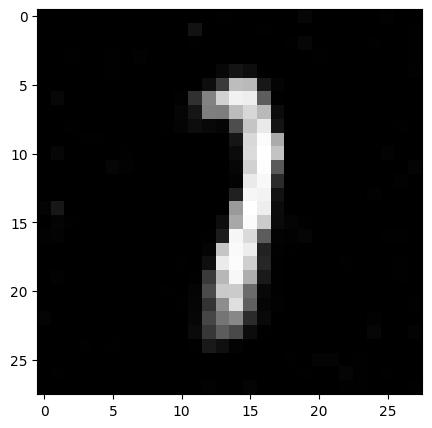

Epoch [163/200], Step [200/600], D Loss: 0.8789, G Loss: 1.6074, D(x): 0.70, D(G(z)): 0.31
Epoch [163/200], Step [400/600], D Loss: 1.0006, G Loss: 1.3927, D(x): 0.75, D(G(z)): 0.38
Epoch [163/200], Step [600/600], D Loss: 0.7468, G Loss: 1.6589, D(x): 0.69, D(G(z)): 0.21


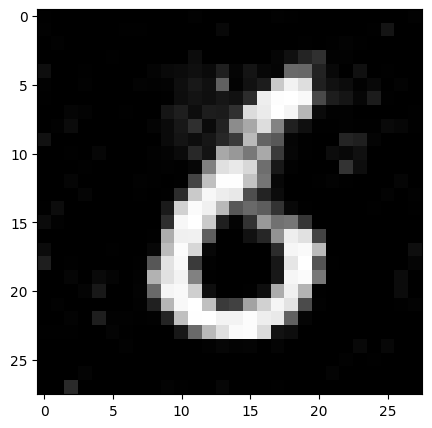

Epoch [164/200], Step [200/600], D Loss: 0.8394, G Loss: 1.9324, D(x): 0.71, D(G(z)): 0.27
Epoch [164/200], Step [400/600], D Loss: 0.7921, G Loss: 1.9814, D(x): 0.75, D(G(z)): 0.28
Epoch [164/200], Step [600/600], D Loss: 0.8355, G Loss: 2.0761, D(x): 0.73, D(G(z)): 0.27


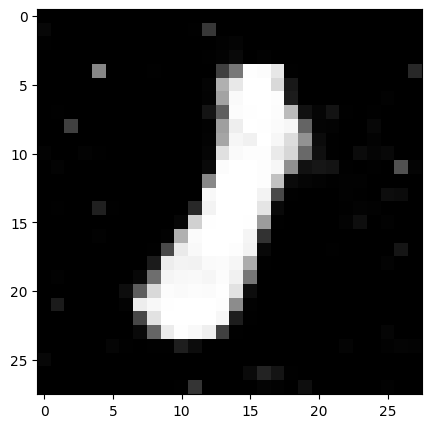

Epoch [165/200], Step [200/600], D Loss: 0.8137, G Loss: 1.7982, D(x): 0.71, D(G(z)): 0.25
Epoch [165/200], Step [400/600], D Loss: 0.9617, G Loss: 1.7477, D(x): 0.69, D(G(z)): 0.32
Epoch [165/200], Step [600/600], D Loss: 0.8908, G Loss: 1.5551, D(x): 0.72, D(G(z)): 0.30


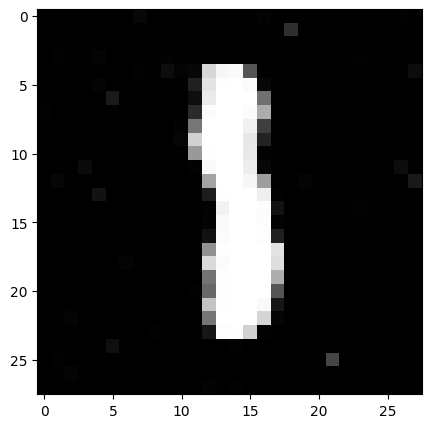

Epoch [166/200], Step [200/600], D Loss: 0.9396, G Loss: 1.6974, D(x): 0.71, D(G(z)): 0.31
Epoch [166/200], Step [400/600], D Loss: 0.8658, G Loss: 1.7699, D(x): 0.71, D(G(z)): 0.30
Epoch [166/200], Step [600/600], D Loss: 1.2300, G Loss: 1.9208, D(x): 0.49, D(G(z)): 0.19


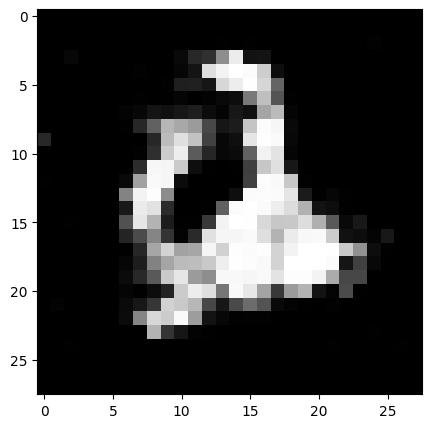

Epoch [167/200], Step [200/600], D Loss: 0.8780, G Loss: 1.7337, D(x): 0.69, D(G(z)): 0.27
Epoch [167/200], Step [400/600], D Loss: 0.8748, G Loss: 1.5886, D(x): 0.65, D(G(z)): 0.24
Epoch [167/200], Step [600/600], D Loss: 0.8717, G Loss: 2.1235, D(x): 0.69, D(G(z)): 0.27


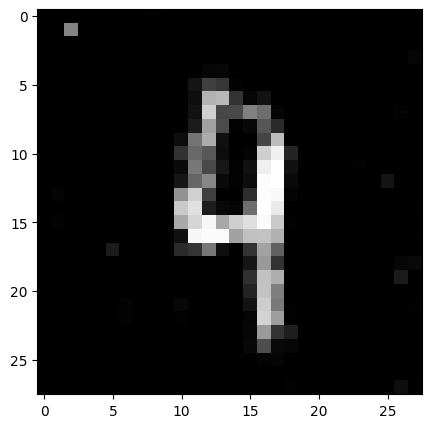

Epoch [168/200], Step [200/600], D Loss: 0.9525, G Loss: 1.4514, D(x): 0.71, D(G(z)): 0.34
Epoch [168/200], Step [400/600], D Loss: 0.8858, G Loss: 1.5880, D(x): 0.75, D(G(z)): 0.35
Epoch [168/200], Step [600/600], D Loss: 0.9582, G Loss: 1.4622, D(x): 0.71, D(G(z)): 0.34


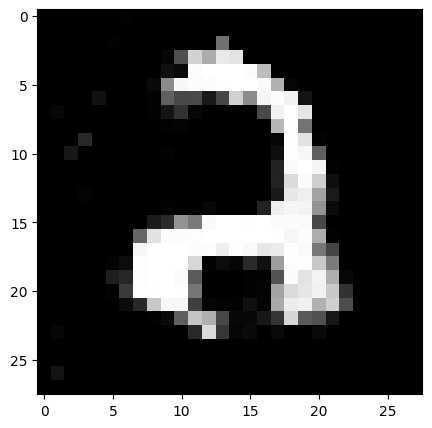

Epoch [169/200], Step [200/600], D Loss: 0.9026, G Loss: 1.2015, D(x): 0.80, D(G(z)): 0.39
Epoch [169/200], Step [400/600], D Loss: 0.8634, G Loss: 1.7578, D(x): 0.65, D(G(z)): 0.21
Epoch [169/200], Step [600/600], D Loss: 0.9674, G Loss: 1.8299, D(x): 0.61, D(G(z)): 0.23


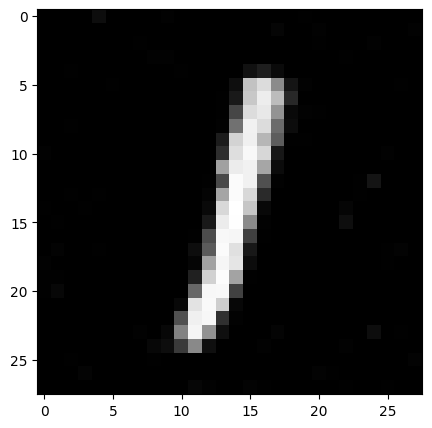

Epoch [170/200], Step [200/600], D Loss: 0.9919, G Loss: 1.4827, D(x): 0.69, D(G(z)): 0.34
Epoch [170/200], Step [400/600], D Loss: 0.9790, G Loss: 1.5006, D(x): 0.64, D(G(z)): 0.29
Epoch [170/200], Step [600/600], D Loss: 0.9654, G Loss: 1.5781, D(x): 0.72, D(G(z)): 0.35


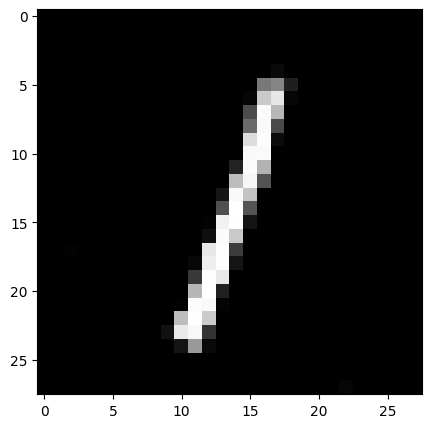

Epoch [171/200], Step [200/600], D Loss: 0.9402, G Loss: 1.2949, D(x): 0.69, D(G(z)): 0.30
Epoch [171/200], Step [400/600], D Loss: 0.8998, G Loss: 1.5481, D(x): 0.66, D(G(z)): 0.26
Epoch [171/200], Step [600/600], D Loss: 1.0354, G Loss: 1.6740, D(x): 0.64, D(G(z)): 0.27


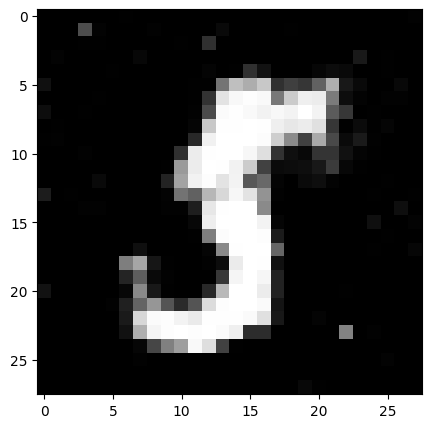

Epoch [172/200], Step [200/600], D Loss: 0.8438, G Loss: 1.9808, D(x): 0.72, D(G(z)): 0.29
Epoch [172/200], Step [400/600], D Loss: 0.8676, G Loss: 1.7539, D(x): 0.72, D(G(z)): 0.33
Epoch [172/200], Step [600/600], D Loss: 0.9963, G Loss: 1.5672, D(x): 0.60, D(G(z)): 0.25


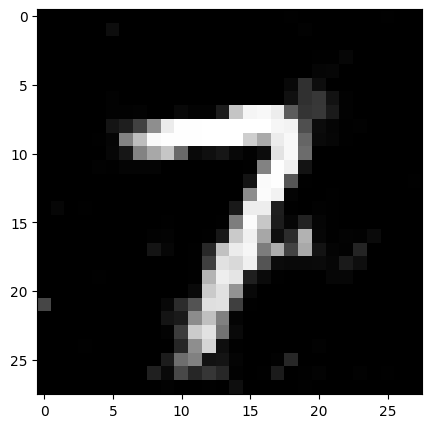

Epoch [173/200], Step [200/600], D Loss: 0.9226, G Loss: 1.5949, D(x): 0.69, D(G(z)): 0.30
Epoch [173/200], Step [400/600], D Loss: 1.0336, G Loss: 1.3789, D(x): 0.68, D(G(z)): 0.31
Epoch [173/200], Step [600/600], D Loss: 1.1007, G Loss: 1.5745, D(x): 0.65, D(G(z)): 0.31


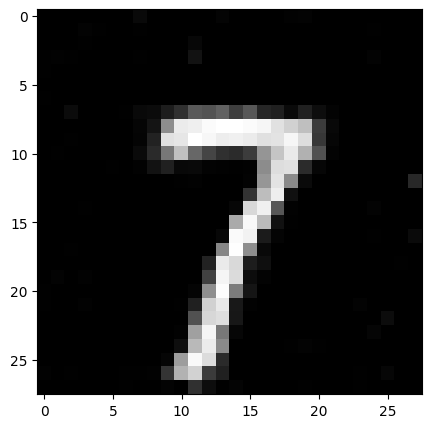

Epoch [174/200], Step [200/600], D Loss: 0.8074, G Loss: 1.5578, D(x): 0.71, D(G(z)): 0.27
Epoch [174/200], Step [400/600], D Loss: 1.0121, G Loss: 1.5527, D(x): 0.62, D(G(z)): 0.26
Epoch [174/200], Step [600/600], D Loss: 0.9041, G Loss: 1.8433, D(x): 0.68, D(G(z)): 0.26


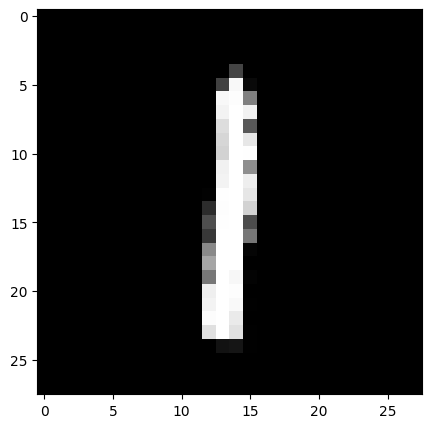

Epoch [175/200], Step [200/600], D Loss: 1.0666, G Loss: 1.3296, D(x): 0.71, D(G(z)): 0.37
Epoch [175/200], Step [400/600], D Loss: 0.9442, G Loss: 1.7052, D(x): 0.64, D(G(z)): 0.27
Epoch [175/200], Step [600/600], D Loss: 0.7179, G Loss: 1.5448, D(x): 0.74, D(G(z)): 0.24


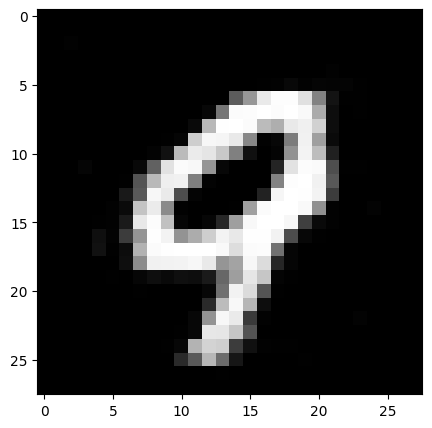

Epoch [176/200], Step [200/600], D Loss: 0.9202, G Loss: 1.3974, D(x): 0.69, D(G(z)): 0.32
Epoch [176/200], Step [400/600], D Loss: 1.0347, G Loss: 1.3853, D(x): 0.62, D(G(z)): 0.28
Epoch [176/200], Step [600/600], D Loss: 0.8461, G Loss: 1.6795, D(x): 0.67, D(G(z)): 0.22


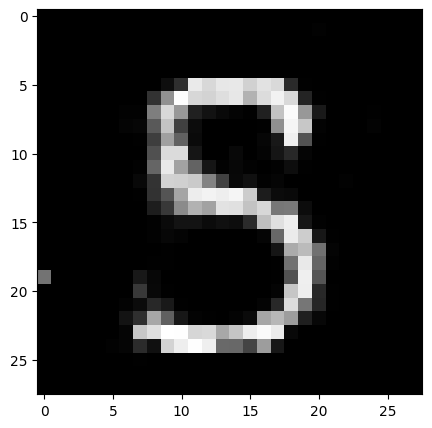

Epoch [177/200], Step [200/600], D Loss: 0.9592, G Loss: 1.3387, D(x): 0.63, D(G(z)): 0.26
Epoch [177/200], Step [400/600], D Loss: 1.1003, G Loss: 1.4980, D(x): 0.60, D(G(z)): 0.26
Epoch [177/200], Step [600/600], D Loss: 0.7993, G Loss: 1.9292, D(x): 0.79, D(G(z)): 0.35


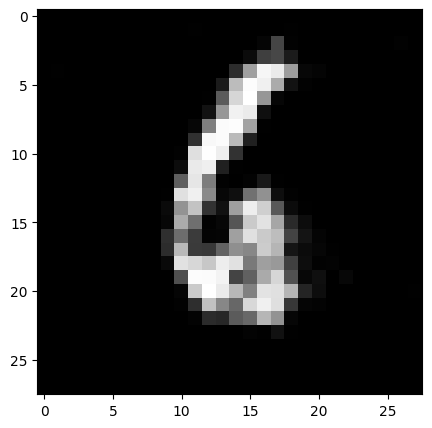

Epoch [178/200], Step [200/600], D Loss: 0.9018, G Loss: 1.2714, D(x): 0.81, D(G(z)): 0.41
Epoch [178/200], Step [400/600], D Loss: 0.9471, G Loss: 1.5049, D(x): 0.66, D(G(z)): 0.26
Epoch [178/200], Step [600/600], D Loss: 0.9101, G Loss: 1.5782, D(x): 0.63, D(G(z)): 0.25


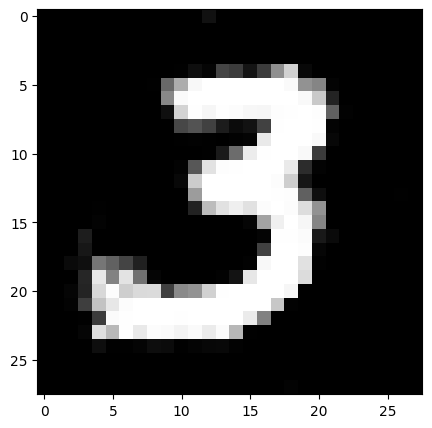

Epoch [179/200], Step [200/600], D Loss: 1.0797, G Loss: 1.5189, D(x): 0.62, D(G(z)): 0.31
Epoch [179/200], Step [400/600], D Loss: 0.9797, G Loss: 1.6723, D(x): 0.66, D(G(z)): 0.28
Epoch [179/200], Step [600/600], D Loss: 1.0184, G Loss: 1.3748, D(x): 0.76, D(G(z)): 0.41


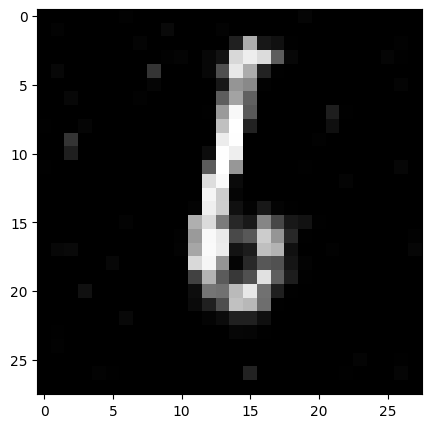

Epoch [180/200], Step [200/600], D Loss: 0.7959, G Loss: 1.6263, D(x): 0.72, D(G(z)): 0.25
Epoch [180/200], Step [400/600], D Loss: 0.8897, G Loss: 1.5073, D(x): 0.78, D(G(z)): 0.37
Epoch [180/200], Step [600/600], D Loss: 0.8994, G Loss: 1.3414, D(x): 0.72, D(G(z)): 0.32


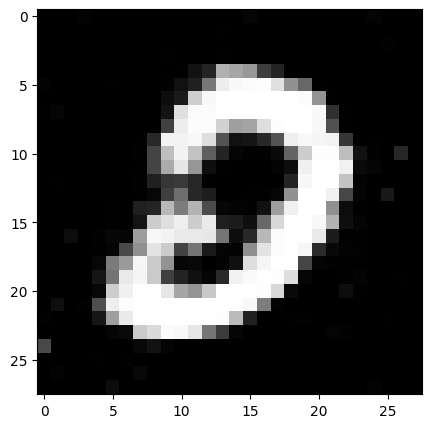

Epoch [181/200], Step [200/600], D Loss: 0.8161, G Loss: 1.3685, D(x): 0.73, D(G(z)): 0.28
Epoch [181/200], Step [400/600], D Loss: 1.0603, G Loss: 1.7267, D(x): 0.64, D(G(z)): 0.31
Epoch [181/200], Step [600/600], D Loss: 0.9903, G Loss: 1.6034, D(x): 0.73, D(G(z)): 0.38


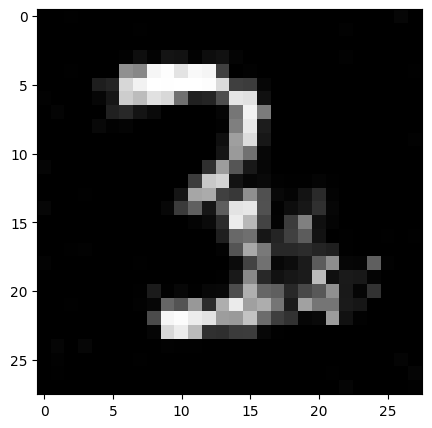

Epoch [182/200], Step [200/600], D Loss: 0.8844, G Loss: 1.7165, D(x): 0.72, D(G(z)): 0.33
Epoch [182/200], Step [400/600], D Loss: 0.8984, G Loss: 1.5048, D(x): 0.63, D(G(z)): 0.24
Epoch [182/200], Step [600/600], D Loss: 0.8928, G Loss: 1.5283, D(x): 0.68, D(G(z)): 0.29


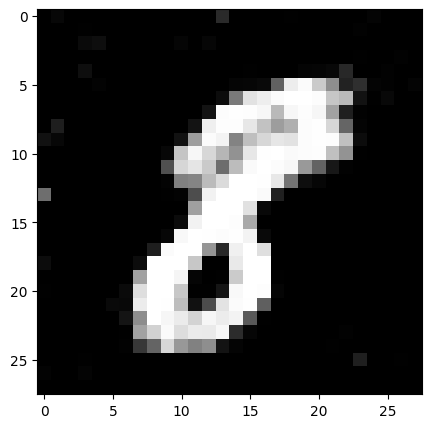

Epoch [183/200], Step [200/600], D Loss: 0.8997, G Loss: 1.3339, D(x): 0.73, D(G(z)): 0.35
Epoch [183/200], Step [400/600], D Loss: 1.0218, G Loss: 1.3382, D(x): 0.70, D(G(z)): 0.36
Epoch [183/200], Step [600/600], D Loss: 0.7949, G Loss: 1.5877, D(x): 0.73, D(G(z)): 0.30


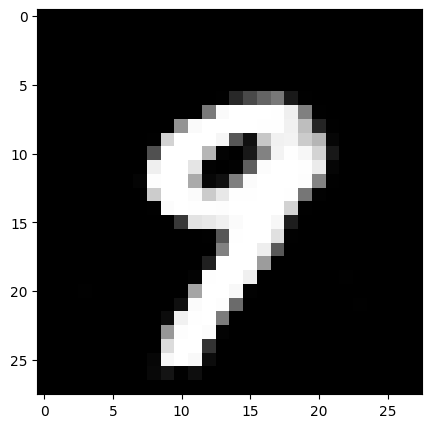

Epoch [184/200], Step [200/600], D Loss: 1.1356, G Loss: 1.7879, D(x): 0.72, D(G(z)): 0.42
Epoch [184/200], Step [400/600], D Loss: 0.9440, G Loss: 1.4826, D(x): 0.70, D(G(z)): 0.29
Epoch [184/200], Step [600/600], D Loss: 0.9323, G Loss: 1.3576, D(x): 0.76, D(G(z)): 0.36


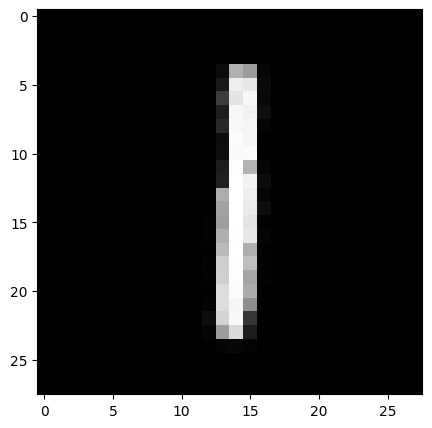

Epoch [185/200], Step [200/600], D Loss: 1.0872, G Loss: 1.4758, D(x): 0.69, D(G(z)): 0.37
Epoch [185/200], Step [400/600], D Loss: 1.0330, G Loss: 1.7046, D(x): 0.70, D(G(z)): 0.35
Epoch [185/200], Step [600/600], D Loss: 0.8891, G Loss: 1.1619, D(x): 0.70, D(G(z)): 0.31


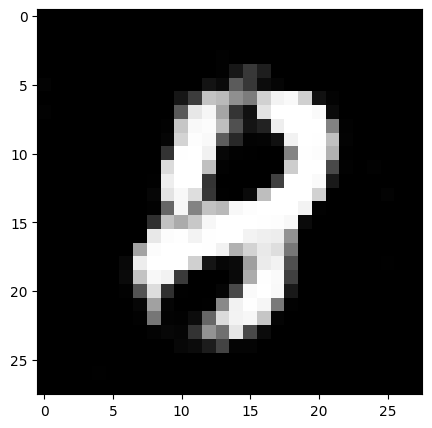

Epoch [186/200], Step [200/600], D Loss: 1.0216, G Loss: 1.3327, D(x): 0.71, D(G(z)): 0.35
Epoch [186/200], Step [400/600], D Loss: 0.8767, G Loss: 1.5175, D(x): 0.74, D(G(z)): 0.33
Epoch [186/200], Step [600/600], D Loss: 1.0404, G Loss: 1.2850, D(x): 0.63, D(G(z)): 0.30


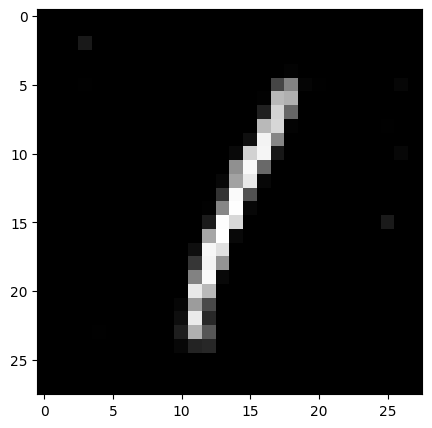

Epoch [187/200], Step [200/600], D Loss: 0.9788, G Loss: 1.7762, D(x): 0.64, D(G(z)): 0.23
Epoch [187/200], Step [400/600], D Loss: 0.9343, G Loss: 1.7279, D(x): 0.67, D(G(z)): 0.30
Epoch [187/200], Step [600/600], D Loss: 0.8963, G Loss: 1.1587, D(x): 0.69, D(G(z)): 0.30


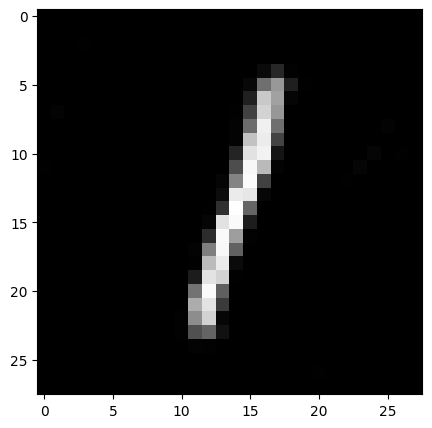

Epoch [188/200], Step [200/600], D Loss: 1.1059, G Loss: 1.7293, D(x): 0.71, D(G(z)): 0.41
Epoch [188/200], Step [400/600], D Loss: 0.9710, G Loss: 1.2575, D(x): 0.67, D(G(z)): 0.31
Epoch [188/200], Step [600/600], D Loss: 0.8987, G Loss: 1.6704, D(x): 0.67, D(G(z)): 0.27


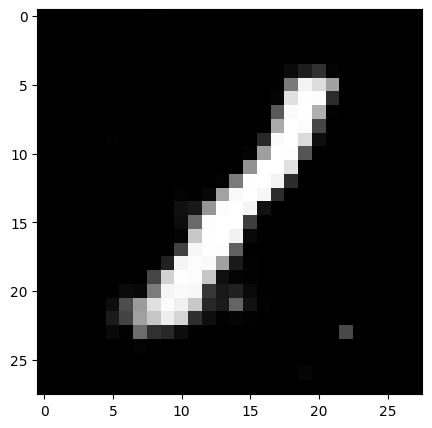

Epoch [189/200], Step [200/600], D Loss: 1.0032, G Loss: 2.2061, D(x): 0.66, D(G(z)): 0.31
Epoch [189/200], Step [400/600], D Loss: 0.9657, G Loss: 1.4397, D(x): 0.73, D(G(z)): 0.35
Epoch [189/200], Step [600/600], D Loss: 0.8526, G Loss: 1.3848, D(x): 0.73, D(G(z)): 0.31


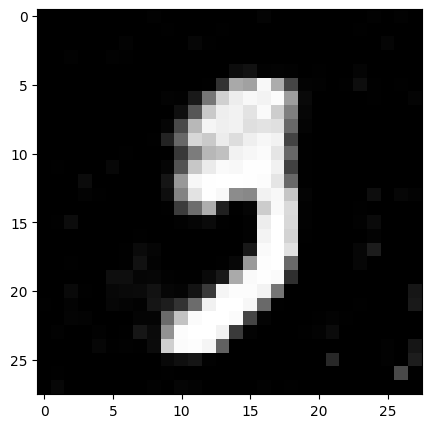

Epoch [190/200], Step [200/600], D Loss: 0.7793, G Loss: 1.8025, D(x): 0.71, D(G(z)): 0.24
Epoch [190/200], Step [400/600], D Loss: 1.1584, G Loss: 1.5308, D(x): 0.63, D(G(z)): 0.33
Epoch [190/200], Step [600/600], D Loss: 0.9132, G Loss: 1.6004, D(x): 0.66, D(G(z)): 0.25


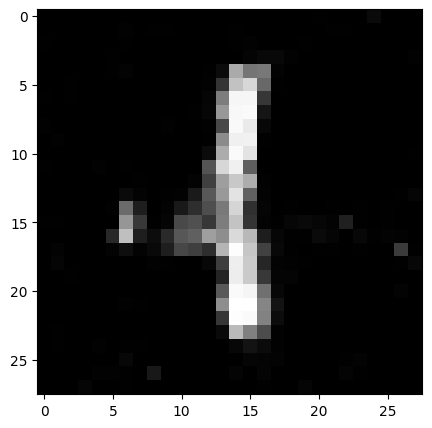

Epoch [191/200], Step [200/600], D Loss: 0.8728, G Loss: 1.6069, D(x): 0.63, D(G(z)): 0.20
Epoch [191/200], Step [400/600], D Loss: 0.9225, G Loss: 1.9714, D(x): 0.62, D(G(z)): 0.24
Epoch [191/200], Step [600/600], D Loss: 1.1777, G Loss: 1.7532, D(x): 0.57, D(G(z)): 0.26


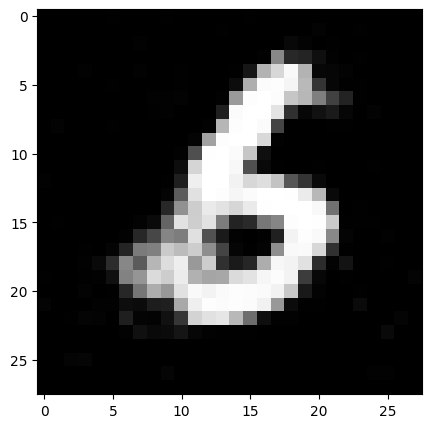

Epoch [192/200], Step [200/600], D Loss: 1.0850, G Loss: 1.5198, D(x): 0.68, D(G(z)): 0.38
Epoch [192/200], Step [400/600], D Loss: 0.9557, G Loss: 1.4713, D(x): 0.72, D(G(z)): 0.34
Epoch [192/200], Step [600/600], D Loss: 0.9801, G Loss: 1.6429, D(x): 0.68, D(G(z)): 0.32


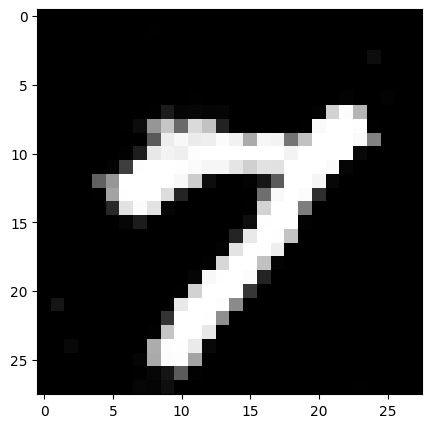

Epoch [193/200], Step [200/600], D Loss: 1.1032, G Loss: 1.5798, D(x): 0.67, D(G(z)): 0.36
Epoch [193/200], Step [400/600], D Loss: 1.1400, G Loss: 1.3389, D(x): 0.74, D(G(z)): 0.43
Epoch [193/200], Step [600/600], D Loss: 0.9899, G Loss: 1.3524, D(x): 0.72, D(G(z)): 0.37


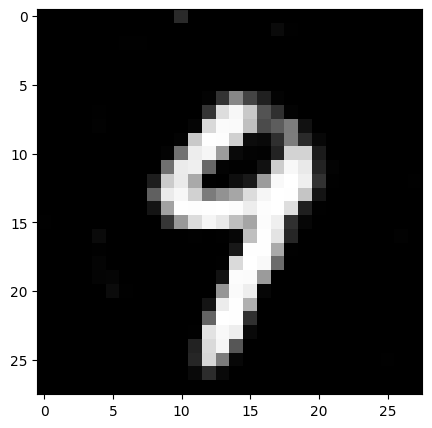

Epoch [194/200], Step [200/600], D Loss: 0.7990, G Loss: 1.6934, D(x): 0.74, D(G(z)): 0.28
Epoch [194/200], Step [400/600], D Loss: 0.9932, G Loss: 1.6702, D(x): 0.68, D(G(z)): 0.32
Epoch [194/200], Step [600/600], D Loss: 1.0179, G Loss: 1.3873, D(x): 0.67, D(G(z)): 0.31


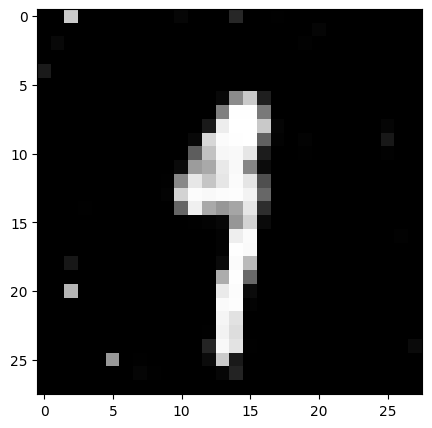

Epoch [195/200], Step [200/600], D Loss: 1.0149, G Loss: 1.7135, D(x): 0.62, D(G(z)): 0.25
Epoch [195/200], Step [400/600], D Loss: 0.9435, G Loss: 1.5218, D(x): 0.64, D(G(z)): 0.28
Epoch [195/200], Step [600/600], D Loss: 1.0195, G Loss: 1.4721, D(x): 0.70, D(G(z)): 0.37


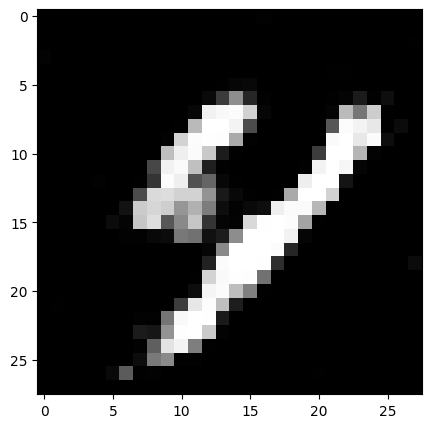

Epoch [196/200], Step [200/600], D Loss: 0.9010, G Loss: 1.7293, D(x): 0.68, D(G(z)): 0.27
Epoch [196/200], Step [400/600], D Loss: 0.8862, G Loss: 1.6905, D(x): 0.69, D(G(z)): 0.27
Epoch [196/200], Step [600/600], D Loss: 0.8827, G Loss: 1.6262, D(x): 0.69, D(G(z)): 0.30


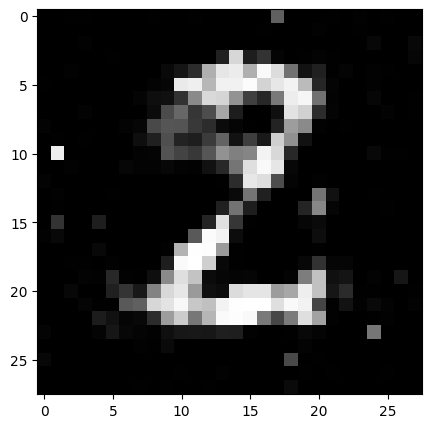

Epoch [197/200], Step [200/600], D Loss: 0.9020, G Loss: 1.3520, D(x): 0.71, D(G(z)): 0.33
Epoch [197/200], Step [400/600], D Loss: 0.8427, G Loss: 1.5214, D(x): 0.69, D(G(z)): 0.26
Epoch [197/200], Step [600/600], D Loss: 1.0807, G Loss: 1.4753, D(x): 0.66, D(G(z)): 0.35


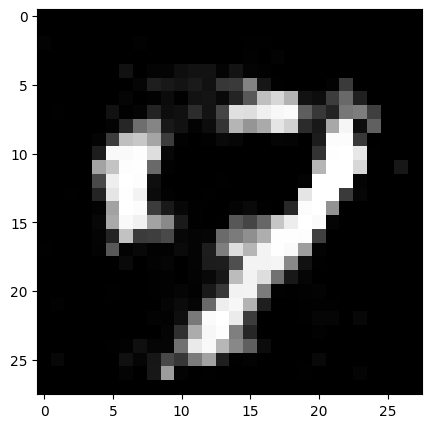

Epoch [198/200], Step [200/600], D Loss: 1.1280, G Loss: 1.4018, D(x): 0.61, D(G(z)): 0.32
Epoch [198/200], Step [400/600], D Loss: 0.9780, G Loss: 1.7005, D(x): 0.68, D(G(z)): 0.31
Epoch [198/200], Step [600/600], D Loss: 0.8529, G Loss: 1.5113, D(x): 0.73, D(G(z)): 0.31


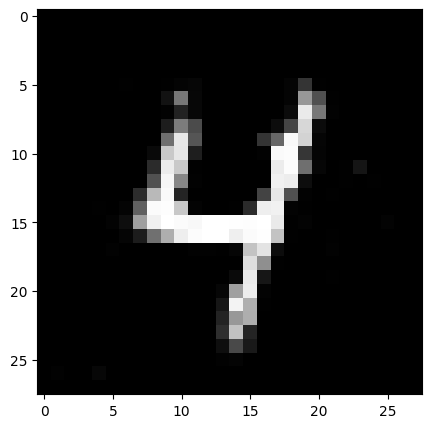

Epoch [199/200], Step [200/600], D Loss: 0.9387, G Loss: 1.8167, D(x): 0.68, D(G(z)): 0.30
Epoch [199/200], Step [400/600], D Loss: 0.9642, G Loss: 1.3513, D(x): 0.67, D(G(z)): 0.31
Epoch [199/200], Step [600/600], D Loss: 1.0866, G Loss: 1.5071, D(x): 0.60, D(G(z)): 0.28


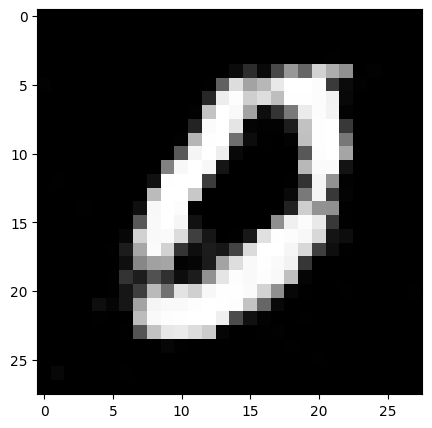

Epoch [200/200], Step [200/600], D Loss: 0.8610, G Loss: 1.5980, D(x): 0.68, D(G(z)): 0.26
Epoch [200/200], Step [400/600], D Loss: 0.9146, G Loss: 1.5577, D(x): 0.68, D(G(z)): 0.31
Epoch [200/200], Step [600/600], D Loss: 0.9174, G Loss: 1.8930, D(x): 0.66, D(G(z)): 0.27


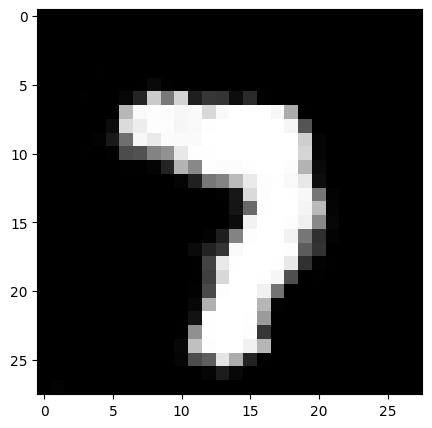

In [5]:
# Function to generate noise
def generate_noise(batch_size, latent_size):
    return torch.randn(batch_size, latent_size).to(device)

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.view(batch_size, -1).to(device)

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        optimizer_d.zero_grad()
        
        outputs = discriminator(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        noise = generate_noise(batch_size, latent_size)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # Backpropagation and optimisation of Discriminator
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        
        # Generate fake images and classify them as real by the Discriminator
        noise = generate_noise(batch_size, latent_size)
        fake_images = generator(noise)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        # Backpropagation and optimisation of Generator
        g_loss.backward()
        optimizer_g.step()

        if (i+1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(data_loader)}], '
                  f'D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}, '
                  f'D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')

    with torch.no_grad():
        noise = generate_noise(batch_size, latent_size)
        fake_images = generator(noise).view(-1, 1, 28, 28)
        fake_images = fake_images.cpu().data

    # Plot generated images
    plt.figure(figsize=(5, 5))
    plt.imshow(fake_images[0].reshape(28, 28), cmap='gray')
    plt.show()

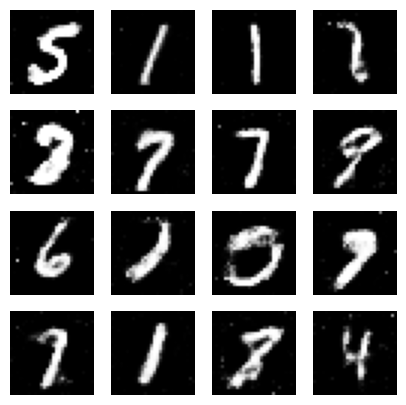

In [8]:
import torch
import matplotlib.pyplot as plt

def generate_and_visualize_images(generator, latent_size, num_images, device):
    # Generate random noise
    noise = torch.randn(num_images, latent_size).to(device)
    
    # Generate images from the noise
    with torch.no_grad():
        fake_images = generator(noise).view(-1, 1, 28, 28)

    fake_images = fake_images.cpu().numpy()

    # Plot the generated images
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(fake_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

latent_size = 64 
num_images = 16 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generate_and_visualize_images(generator, latent_size, num_images, device)